#Paso 0 *– Dataset y descripción de variables*
---------------------------------------------
0.1. Cargar el dataset en Google Colab

Primero, subimos el archivo data-churn.csv a Colab.


In [94]:
# Paso 0.1: Importar librerías básicas
import pandas as pd

# Si estás en Google Colab, descomenta estas líneas para subir el archivo
# from google.colab import files
# uploaded = files.upload()  # Aquí seleccionas data-churn.csv desde tu PC

# Cargar el CSV (ajusta el nombre si es distinto)
df = pd.read_csv("/content/data-churn.csv")

# Ver las primeras filas para entender la estructura
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


0.2. Inspección general del dataset

Aquí revisamos tamaño, columnas y tipos de datos.

In [95]:
# Dimensiones del dataset: (n_filas, n_columnas)
df.shape


(7043, 21)

In [96]:
# Ver nombres de columnas
df.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [97]:
# Información general: tipo de dato por columna y cantidad de valores no nulos
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


0.3. Identificación de la variable objetivo

Según el enunciado, la variable objetivo es churn, que indica si el cliente se fue o no:

Churn = 1 → cliente se va (churn)

Churn = 0 → cliente se queda

En el archivo original aparece como texto "Yes" / "No". Más adelante la transformaremos a 1/0, pero en el Paso 0 solo la identificamos.

In [98]:
# Revisar valores posibles de la variable objetivo
df["Churn"].value_counts()


,count
Churn,
No,5174
Yes,1869


0.4. Identificación de variables numéricas y categóricas

Ahora clasificamos las variables:

0.4.1. Variables numéricas

Conceptualmente representan cantidades / montos / tiempos:

tenure: tiempo que el cliente lleva con la compañía (en meses).

MonthlyCharges: cargos mensuales que paga el cliente.

TotalCharges: total pagado por el cliente.

SeniorCitizen: indicador 0/1 de si es adulto mayor.

Se puede tratar como numérica (0 y 1) o como categórica binaria.

En muchos modelos de ML se usa como numérica; en este paso solo marcamos que es un indicador binario.

In [99]:
numeric_features = [
    "SeniorCitizen",   # indicador 0/1
    "tenure",          # meses
    "MonthlyCharges",  # monto mensual
    "TotalCharges"     # total pagado (de momento tipo object, pero es cantidad)
]

numeric_features


['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

Nota: más adelante tendremos que convertir TotalCharges de texto (object) a número (float), porque es una cantidad y puede contener espacios en blanco o valores faltantes.

0.4.2. Variables categóricas

Son variables que representan categorías, tipos de servicio o atributos cualitativos:

customerID → identificador único del cliente (no es una “feature” útil, solo ID).

gender → género del cliente.

Partner → tiene pareja (Yes/No).

Dependents → tiene dependientes (Yes/No).

PhoneService → tiene servicio telefónico (Yes/No).

MultipleLines → múltiples líneas (Yes/No/No phone service).

InternetService → tipo de internet (DSL/Fiber optic/No).

OnlineSecurity → tiene seguridad en línea (Yes/No/No internet service).

OnlineBackup → tiene backup online.

DeviceProtection → tiene protección de dispositivo.

TechSupport → tiene soporte técnico.

StreamingTV → tiene streaming TV.

StreamingMovies → tiene streaming de películas.

Contract → tipo de contrato (Month-to-month, One year, Two year).

PaperlessBilling → boleta electrónica (Yes/No).

PaymentMethod → método de pago (Electronic check, etc.).

Churn → VARIABLE OBJETIVO (categoría Yes/No, luego pasará a binaria 1/0).

Podemos definir las categóricas (excluyendo el ID y dejando fuera Churn porque es target):

In [100]:
categorical_features = [
    "gender",
    "Partner",
    "Dependents",
    "PhoneService",
    "MultipleLines",
    "InternetService",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
    "Contract",
    "PaperlessBilling",
    "PaymentMethod"
]

categorical_features


['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

Verificar que efectivamente estas columnas son tipo object (categóricas) en el DataFrame:

In [101]:
df[categorical_features].dtypes


,0
gender,object
Partner,object
Dependents,object
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object
DeviceProtection,object
TechSupport,object


0.5. Resumen del Paso 0 (para escribir en Markdown en el notebook)


## Paso 0 – Dataset y descripción de variables

Trabajamos con un dataset de clientes de una empresa de telecomunicaciones, cuyo objetivo es predecir la probabilidad de fuga (**churn**).

- **Tamaño del dataset:** 7043 filas y 21 columnas.
- **Variable objetivo (target):** `Churn`, binaria:
  - `Yes` = el cliente se va.
  - `No` = el cliente se queda.

### Variables numéricas

- `SeniorCitizen`: indicador (0 = no es adulto mayor, 1 = adulto mayor).
- `tenure`: número de meses que el cliente lleva con la empresa.
- `MonthlyCharges`: cargos mensuales cobrados al cliente.
- `TotalCharges`: total facturado al cliente a lo largo del tiempo (actualmente tipo texto, pero conceptualmente numérica).

### Variables categóricas

- `customerID`: identificador único del cliente (no se usará como feature predictiva).
- `gender`
- `Partner`
- `Dependents`
- `PhoneService`
- `MultipleLines`
- `InternetService`
- `OnlineSecurity`
- `OnlineBackup`
- `DeviceProtection`
- `TechSupport`
- `StreamingTV`
- `StreamingMovies`
- `Contract`
- `PaperlessBilling`
- `PaymentMethod`

La variable `Churn` se maneja como categórica en el archivo original (`Yes`/`No`), pero en el modelamiento se transformará a una variable binaria (1/0).


#PASO 1: Exploración y Preprocesamiento de Datos
---------------------------------------------
Este paso incluye:

Exploración inicial

Tamaño del dataset

Proporción de churn vs no churn

Estadísticos descriptivos (numéricos + categóricos)

Todo explicado paso a paso y con código preparado para copiar y ejecutar.

###1.1. Exploración inicial del dataset
###1.1.1. Tamaño del dataset

Este comando muestra cuántas filas (clientes) y columnas (variables) tiene el dataset.

In [102]:
# Tamaño del dataset: (n_filas, n_columnas)
df.shape


(7043, 21)

###1.1.2. Proporción de churn vs no churn

Primero revisamos cuántos clientes se fueron ("Yes") y cuántos se quedaron ("No").

In [103]:
# Conteo simple
df["Churn"].value_counts()


,count
Churn,
No,5174
Yes,1869


Para ver los porcentajes:

In [104]:
df["Churn"].value_counts(normalize=True) * 100


,proportion
Churn,
No,73.463013
Yes,26.536987


### Interpretación esperada

Normalmente en este dataset ocurre lo siguiente:

No = 73% (clientes que se quedan)

Yes = 27% (clientes que se van)

Esto indica desbalance de clases, lo cual es importante para los modelos de clasificación porque:

Los modelos podrían aprender a predecir siempre “No”.

Se deben aplicar técnicas como:

pesos en la clase

sobremuestreo (SMOTE)

undersampling

métricas más robustas como F1-score o ROC-AUC

### 1.1.3. Estadísticos básicos de variables numéricas

Vamos a obtener estadísticas clásicas:

media

desviación estándar

mínimo

máximo

percentiles

In [105]:
# Estadísticos de variables numéricas
df.describe()


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Esto mostrará estadísticas para:

SeniorCitizen

tenure

MonthlyCharges

(si TotalCharges estuviera ya convertido a numérico)

Nota: si todavía TotalCharges es tipo texto (object), no aparecerá aquí.
En el preprocesamiento del Paso 2 será transformado correctamente.

### 1.1.4. Conteo de categorías para variables categóricas

Esto permite revisar qué valores contiene cada variable cualitativa.

Podemos hacerlo de forma individual, por ejemplo:

In [106]:
df["gender"].value_counts()
df["Contract"].value_counts()
df["PaymentMethod"].value_counts()


,count
PaymentMethod,
Electronic check,2365
Mailed check,1612
Bank transfer (automatic),1544
Credit card (automatic),1522


Pero también podemos hacerlo de forma automática:

In [107]:
# Identificar variables categóricas (excluyendo la variable objetivo)
categorical_columns = df.select_dtypes(include=["object"]).columns

# Mostrar conteos de manera compacta
for col in categorical_columns:
    print(f"\n--- {col} ---")
    print(df[col].value_counts())



--- customerID ---
customerID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
8775-CEBBJ    1
2823-LKABH    1
             ..
6713-OKOMC    1
1452-KIOVK    1
9305-CDSKC    1
9237-HQITU    1
7795-CFOCW    1
Name: count, Length: 7043, dtype: int64

--- gender ---
gender
Male      3555
Female    3488
Name: count, dtype: int64

--- Partner ---
Partner
No     3641
Yes    3402
Name: count, dtype: int64

--- Dependents ---
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

--- PhoneService ---
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

--- MultipleLines ---
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

--- InternetService ---
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

--- OnlineSecurity ---
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

--- OnlineBackup -

## Paso 1 – Exploración y preprocesamiento de datos

### 1.1. Exploración inicial

**Tamaño del dataset:**  
- El dataset contiene 7043 observaciones y 21 variables.

**Distribución de la variable objetivo (`Churn`):**  
- Existe un desbalance importante: aproximadamente 73% de los clientes no abandonan el servicio (No) y 27% sí lo hacen (Yes).  
- Se deben considerar técnicas para tratar el desbalance en etapas posteriores (ajuste de pesos, sobremuestreo, etc.).

**Estadísticos descriptivos de variables numéricas:**  
- Se revisaron media, desviación estándar, mínimos y máximos.  
- Las variables clave (`tenure`, `MonthlyCharges`, `TotalCharges`) muestran variabilidad que podría ser útil para modelos predictivos.

**Variables categóricas:**  
- Se analizaron conteos de cada categoría en variables como `gender`, `Contract`, `InternetService`, etc.  
- Algunas contienen respuestas tipo "No internet service" o "No phone service", lo cual puede requerir recodificación más adelante.

Este análisis inicial permite identificar rápidamente la estructura del dataset, la presencia de desbalance de clases, y los tipos de datos que deberán procesarse antes de aplicar modelos de Machine Learning.


🧹 2. Tratamiento de Datos Faltantes

En este paso:

1. Identificamos valores faltantes.
2. Elegimos estrategias de imputación apropiadas:

   * Media o mediana → numéricas
   * Moda → categóricas

Eliminación → casos excepcionales (como TotalCharges con espacios)

###2.1. Identificar valores faltantes

Primero revisamos cuántos valores faltantes tiene cada columna.

In [108]:
# Contar valores faltantes por columna
df.isna().sum()


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


Sin embargo, en este dataset algunas columnas parecen no tener NA, pero sí contienen valores vacíos o espacios " ", especialmente TotalCharges.

Por eso revisamos también valores vacíos:

In [109]:
# Revisar valores vacíos o espacios que equivalen a NA
(df == " ").sum()


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


###2.2. Convertir valores vacíos en TotalCharges a NA

In [110]:
# Reemplazar espacios vacíos (" ") por NA en TotalCharges
df["TotalCharges"] = df["TotalCharges"].replace(" ", pd.NA)

# Convertir columna a numérica
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"])


Esto generará NA reales donde antes había texto vacío.

Verificamos:

In [111]:
df["TotalCharges"].isna().sum()


np.int64(11)

###2.3. Estrategia para tratar valores faltantes
✔ Variables numéricas → imputación por mediana

¿Por qué mediana y no media?

* La mediana es más robusta ante valores extremos.

* En churn, los cargos (TotalCharges, MonthlyCharges) pueden tener outliers.

In [112]:
from sklearn.impute import SimpleImputer

# Columnas numéricas
numeric_cols = ["SeniorCitizen", "tenure", "MonthlyCharges", "TotalCharges"]

# Imputador de mediana
imputer_num = SimpleImputer(strategy="median")

# Aplicar imputación
df[numeric_cols] = imputer_num.fit_transform(df[numeric_cols])


✔ Variables categóricas → imputación por categoría más frecuente (moda)

Esto ayuda cuando faltan valores como “Yes/No” o “type of internet”.

In [113]:
# Columnas categóricas (excluyendo churn y customerID)
categorical_cols = [
    "gender", "Partner", "Dependents", "PhoneService", "MultipleLines",
    "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection",
    "TechSupport", "StreamingTV", "StreamingMovies", "Contract",
    "PaperlessBilling", "PaymentMethod"
]

# Imputador categórico (moda)
imputer_cat = SimpleImputer(strategy="most_frequent")

# Aplicar imputación
df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])


###Alternativa: Eliminar filas

Para este dataset, las únicas filas con NA reales son ~11 casos de TotalCharges correspondientes a clientes muy nuevos (tenure = 0 meses).

Eliminar estas filas también es válido:

In [114]:
# Alternativa opcional: eliminar filas con TotalCharges faltante
df = df.dropna(subset=["TotalCharges"])


Ambas estrategias son correctas según el objetivo del análisis.
Por defecto, usamos imputación, porque:

* Evita perder información.
* Mantiene el dataset completo para entrenamiento.

###2.4. Verificación final

In [115]:
df.isna().sum()


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


## 2. Tratamiento de Datos Faltantes

### 2.1. Identificación de valores faltantes
Se revisaron valores NA reales y valores vacíos (" ") que normalmente aparecen en la columna `TotalCharges`.  
Los resultados mostraron:

- `TotalCharges` contenía 11 valores vacíos.
- El resto de las variables no presentaba NA reales.

### 2.2. Corrección de valores vacíos
Los espacios en blanco fueron reemplazados con valores faltantes (`NA`) y luego convertidos a formato numérico.

### 2.3. Estrategias de imputación

**Para variables numéricas** (`SeniorCitizen`, `tenure`, `MonthlyCharges`, `TotalCharges`):
- Se aplicó imputación por **mediana**, debido a su robustez ante valores extremos.

**Para variables categóricas:**
- Se utilizó imputación por **categoría más frecuente (moda)**.

### 2.4. Alternativa posible
En lugar de imputar, también es razonable eliminar las ~11 filas con `TotalCharges` faltante, dado que representan clientes con `tenure = 0`.  
No obstante, se prefirió **mantener el dataset completo mediante imputación**.

Después de aplicar las imputaciones, no quedan valores faltantes en el dataset.


###3. Codificación de Variables Categóricas

Después del tratamiento de valores faltantes, el siguiente paso es transformar todas las variables categóricas en variables numéricas para que los modelos de Machine Learning puedan procesarlas.

##3.1. Identificar variables categóricas

Excluimos:

* customerID → identificador único (no sirve como variable predictiva)

* Churn → la convertiremos luego a 0/1

In [116]:
# Identificar variables categóricas EXCLUYENDO customerID y Churn
categorical_cols = [
    col for col in df.select_dtypes(include="object").columns
    if col not in ["customerID", "Churn"]
]

categorical_cols


['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

###3.2. Opción 1 (más simple): One-hot encoding con pandas → get_dummies()

In [117]:
# One-hot encoding con drop_first para evitar multicolinealidad
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Mostrar las primeras columnas codificadas
df_encoded.head()


,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0.0,1.0,29.85,29.85,No,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
1,5575-GNVDE,0.0,34.0,56.95,1889.50,No,True,False,False,True,...,False,False,False,False,True,False,False,False,False,True
2,3668-QPYBK,0.0,2.0,53.85,108.15,Yes,True,False,False,True,...,False,False,False,False,False,False,True,False,False,True
3,7795-CFOCW,0.0,45.0,42.30,1840.75,No,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,9237-HQITU,0.0,2.0,70.70,151.65,Yes,False,False,False,True,...,False,False,False,False,False,False,True,False,True,False


###Ventajas de esta opción:

* Fácil de implementar
* Rápido
* Genera un dataframe limpio listo para modelar

###¿Qué hace drop_first=True?

Evita crear columnas redundantes que generan multicolinealidad perfecta, por ejemplo:

En lugar de crear:

* Contract_Month-to-month
* Contract_One year
* Contract_Two year

Con drop_first=True crea solo:

* Contract_One year
* Contract_Two year

La categoría faltante se infiere automáticamente.

###3.3. Codificar la variable objetivo Churn (Yes/No → 1/0)

Esto lo hacemos después del one-hot encoding

In [118]:
df_encoded["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})


Verificar:

In [119]:
df_encoded["Churn"].value_counts()


,count
Churn,
0,5174
1,1869


###3.4. Opción 2 (más formal): OneHotEncoder de scikit-learn

Si deseas usar pipelines o modelos avanzados, esta es la opción recomendada.

In [120]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Definir transformador para variables categóricas
encoder = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", sparse_output=False), categorical_cols)
    ],
    remainder="passthrough"
)

# Aplicar codificación
df_encoded2 = encoder.fit_transform(df)

# Convertir a DataFrame
df_encoded2 = pd.DataFrame(df_encoded2)


Nota:

* drop="first" evita multicolinealidad
* sparse_output=False genera matriz densa (opcional)

# 3.5. Verificación final del dataset

In [121]:
df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   SeniorCitizen                          7043 non-null   float64
 2   tenure                                 7043 non-null   float64
 3   MonthlyCharges                         7043 non-null   float64
 4   TotalCharges                           7043 non-null   float64
 5   Churn                                  7043 non-null   int64  
 6   gender_Male                            7043 non-null   bool   
 7   Partner_Yes                            7043 non-null   bool   
 8   Dependents_Yes                         7043 non-null   bool   
 9   PhoneService_Yes                       7043 non-null   bool   
 10  MultipleLines_No phone service         7043 non-null   bool   
 11  Mult

Debes ver:

* Todas las variables categóricas transformadas
* Dataset completamente numérico
* customerID ya no está
* Churn está como 0/1

## 3. Codificación de Variables Categóricas

Para entrenar modelos de Machine Learning es necesario transformar todas las variables categóricas a formato numérico. Se excluyó la columna `customerID`, ya que es solo un identificador y no aporta información predictiva.

### 3.1. Identificación de variables categóricas
Se seleccionaron todas las columnas de tipo `object`, exceptuando:
- `customerID` (ID del cliente)
- `Churn` (variable objetivo)

### 3.2. One-hot encoding
Se aplicó one-hot encoding utilizando `pandas.get_dummies()` con `drop_first=True`, lo que permite evitar la multicolinealidad perfecta generada por variables completamente redundantes.

### 3.3. Codificación de la variable objetivo
La variable `Churn` fue transformada de:
- `Yes` → 1  
- `No` → 0  

### 3.4. Resultado
El dataset resultante (`df_encoded`) queda totalmente numérico y listo para las siguientes etapas de preprocesamiento (escalamiento y división train/test).


##4. Escalamiento de Variables Numéricas

El propósito del escalamiento es homogeneizar las escalas de las variables numéricas para que no distorsionen los modelos de Machine Learning que son sensibles a la magnitud (SVM, KNN, regresión logística, redes neuronales, etc.).

En este paso usaremos:

StandardScaler

$$
z = \frac{x - \mu}{\sigma}
$$


Donde:

𝜇
μ = media

𝜎
σ = desviación estándar

El resultado son variables con:

Media = 0

Varianza = 1

### 4.1. Identificar variables numéricas

Si seguiste los pasos anteriores, tus variables numéricas deberían ser:

In [122]:
numeric_cols = ["SeniorCitizen", "tenure", "MonthlyCharges", "TotalCharges"]


###4.2. Escalar con StandardScaler
###⚠ Importante antes de escalar:

* NO se deben escalar variables dummies creadas con get_dummies()
* NO se debe escalar la variable objetivo (Churn)

Aquí aplicamos StandardScaler solo a las numéricas.

In [123]:
from sklearn.preprocessing import StandardScaler

# Crear el escalador
scaler = StandardScaler()

# Aplicar escalamiento SOLO a columnas numéricas
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])


###4.3. Verificación del escalamiento

In [124]:
df_encoded[numeric_cols].describe()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03
mean,-4.842546e-17,-2.421273e-17,-6.406285e-17,-1.488074e-17
std,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00
min,-4.399165e-01,-1.318165e+00,-1.545860e+00,-9.991203e-01
25%,-4.399165e-01,-9.516817e-01,-9.725399e-01,-8.298459e-01
50%,-4.399165e-01,-1.372744e-01,1.857327e-01,-3.904632e-01
75%,-4.399165e-01,9.214551e-01,8.338335e-01,6.642871e-01
max,2.273159e+00,1.613701e+00,1.794352e+00,2.826743e+00


como


| Estadístico | Valor                               |
|-------------|--------------------------------------|
| mean        | ≈ 0                                  |
| std         | ≈ 1                                  |
| min/max     | valores centrados alrededor de 0     |

Si quieres, puedo darle estilo más profesional o convertirla a LaTeX.

## 4. Escalamiento de Variables Numéricas

El escalamiento permite que todas las variables numéricas estén en una misma escala, evitando que algunas variables dominen el comportamiento del modelo por tener valores mucho mayores en magnitud.

### 4.1. Variables numéricas identificadas
- `SeniorCitizen`
- `tenure`
- `MonthlyCharges`
- `TotalCharges`

### 4.2. Método utilizado: StandardScaler
Se aplicó estandarización usando:

\[
z = \frac{x - \mu}{\sigma}
\]

El resultado son variables con media 0 y desviación estándar 1.

### 4.3. Resultado
Las variables numéricas están ahora transformadas a una escala homogénea, lo cual mejora la estabilidad y desempeño de modelos como KNN, regresión logística, SVM y redes neuronales.

El dataset `df_encoded` queda listo para la siguiente etapa: **división en entrenamiento y prueba**.


#5. Definir matriz de features (X) y vector objetivo (y)
### 5.1. Definir la variable objetivo y

Nuestra variable objetivo es Churn, ya codificada como:

* 1 → cliente se va (churn)
* 0 → cliente se queda

Creamos y como una Serie de pandas:

In [125]:
# Vector objetivo (target)
y = df_encoded["Churn"]


## 5.2. Definir la matriz de features X

X debe contener todas las variables explicativas preprocesadas, es decir:

* Variables numéricas ya escaladas
* Variables categóricas ya codificadas con one-hot
* Sin Churn
* Sin customerID (no es una feature útil)

Primero nos aseguramos de eliminar customerID si todavía existe:

In [126]:
# Si todavía existe customerID dentro de df_encoded, lo eliminamos
if "customerID" in df_encoded.columns:
    df_encoded = df_encoded.drop(columns=["customerID"])


Luego definimos X como todas las columnas excepto Churn:

In [127]:
# Matriz de features: todas las columnas menos la variable objetivo
X = df_encoded.drop(columns=["Churn"])


## 5.3. Verificar dimensiones de X e y

Es buena práctica revisar que todo calza:

In [128]:
X.shape, y.shape


((7043, 30), (7043,))

Donde N_features es el número total de columnas que quedaron después del preprocesamiento.

##Resumen en Markdown para tu notebook

Copia y pega esto en una celda Markdown:

## 5. Definición de matriz de *features* (X) y vector objetivo (y)

En esta etapa se separa el dataset preprocesado en:

- `X`: matriz de características (variables explicativas).
- `y`: vector objetivo (variable a predecir).

### 5.1. Vector objetivo (y)

La variable objetivo es `Churn`, previamente codificada como:

- `1`: el cliente abandona el servicio (churn).
- `0`: el cliente permanece en la compañía.

```python
y = df_encoded["Churn"]


In [129]:
y = df_encoded["Churn"]

###5.2. Matriz de features (X)

La matriz de features incluye todas las variables numéricas y categóricas preprocesadas (escaladas y codificadas), excluyendo:

Churn (objetivo).

customerID (identificador, no aporta capacidad predictiva).

In [130]:
if "customerID" in df_encoded.columns:
    df_encoded = df_encoded.drop(columns=["customerID"])

X = df_encoded.drop(columns=["Churn"])


###5.3. Verificación de dimensiones

In [131]:
X.shape, y.shape


((7043, 30), (7043,))

De esta forma, el dataset queda preparado para la siguiente fase: división en conjuntos de entrenamiento y prueba (train/test split) y posterior entrenamiento de modelos de Machine Learning.

### Justificación de las decisiones de preprocesamiento

A continuación se presentan las razones técnicas que justifican cada una de las transformaciones realizadas en el Paso 1 del preprocesamiento.

## 6. Justificación del preprocesamiento aplicado

El preprocesamiento realizado en el dataset sigue buenas prácticas de Machine Learning y tiene como objetivo garantizar que los modelos puedan aprender de forma eficiente, estable y sin sesgos. Las principales decisiones tomadas se justifican de la siguiente manera:

### 6.1. Tratamiento de valores faltantes
Se identificó que la variable `TotalCharges` contenía valores vacíos representados como `" "`. Estos valores se transformaron en `NA` y luego fueron imputados mediante la **mediana**, porque:
- La mediana es más robusta a valores extremos que la media.
- `TotalCharges` presenta distribución no uniforme y posibles outliers.
- La imputación evita perder observaciones, manteniendo un dataset completo.

Las variables categóricas se imputaron usando la **categoría más frecuente**, ya que:
- Mantiene consistencia interna del dataset.
- No altera la estructura general de las categorías.
- Es una estrategia estándar cuando los faltantes son pocos o no llevan información relevante.

### 6.2. Codificación de variables categóricas
Se aplicó **one-hot encoding** para transformar categorías en variables numéricas, lo que permite que modelos como regresión logística, árboles o redes neuronales puedan procesarlas correctamente.

El parámetro `drop_first=True` se utilizó para:
- Evitar **multicolinealidad perfecta**, especialmente importante para modelos lineales.
- Reducir dimensionalidad sin perder información.

La variable `customerID` fue eliminada porque no aporta información predictiva (es sólo un identificador).

### 6.3. Escalamiento de variables numéricas
Se utilizó **StandardScaler** (estandarización), que transforma cada variable a media 0 y desviación estándar 1. Esto se justifica porque:
- Modelos como regresión logística, KNN, SVM y redes neuronales son sensibles a la escala.
- Permite que todas las variables contribuyan de manera equilibrada.
- Mejora la estabilidad numérica y la velocidad de convergencia durante el entrenamiento.

### 6.4. Definición de X e y
Se definió:
- `y` como la variable objetivo (`Churn`), transformada a binaria (1/0).
- `X` como todas las variables predictoras preprocesadas (numéricas escaladas + categóricas codificadas).

Con estas transformaciones, el dataset queda en una forma completamente numérica, sin valores faltantes, en una escala homogénea y sin multicolinealidad, lo que habilita un entrenamiento correcto de modelos de Machine Learning.



# PASO 2 — MODELO BASE: REGRESIÓN LOGÍSTICA, específicamente la parte solicitada:

--------------------------------------------

 1. División del dataset usando Validación Cruzada Estratificada (Stratified K-Fold)

Esta sección incluye:

Explicación técnica

Código completo para Google Colab

Justificación

Versión en Markdown para tu notebook

### Objetivo del Paso 2.1

Dividir los datos en entrenamiento y evaluación utilizando validación cruzada estratificada, asegurando que la proporción de clases (churn vs no churn) se mantenga en cada fold.

Esto es muy importante porque:

* El dataset está desbalanceado

* Sin estratificación, algunos folds podrían quedar sin suficientes casos de churn

* La regresión logística depende de una distribución estable para estimar los coeficientes

### 2.1. Crear validación cruzada estratificada (k-fold)

* Elegimos k = 5 (muy usado en industria).
* Puedes usar k = 10 para mayor estabilidad a costa de más tiempo computacional.

### Código completo

Asegúrate de que las variables X y y ya estén definidas desde el Paso 1.

In [132]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Definir el modelo base
model = LogisticRegression(max_iter=200, solver='liblinear')

# Crear partición estratificada
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Para almacenar resultados
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

# Validación cruzada
for train_index, test_index in skf.split(X, y):

    # Dividir datos
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Entrenar modelo
    model.fit(X_train, y_train)

    # Predicciones
    y_pred = model.predict(X_test)

    # Métricas
    accuracy_list.append(accuracy_score(y_test, y_pred))
    precision_list.append(precision_score(y_test, y_pred))
    recall_list.append(recall_score(y_test, y_pred))
    f1_list.append(f1_score(y_test, y_pred))

# Resultados finales
print("Resultados promedio (5-Fold Stratified CV):")
print(f"Accuracy promedio:   {sum(accuracy_list)/len(accuracy_list):.4f}")
print(f"Precision promedio:  {sum(precision_list)/len(precision_list):.4f}")
print(f"Recall promedio:     {sum(recall_list)/len(recall_list):.4f}")
print(f"F1-score promedio:   {sum(f1_list)/len(f1_list):.4f}")


Resultados promedio (5-Fold Stratified CV):
Accuracy promedio:   0.8052
Precision promedio:  0.6581
Recall promedio:     0.5521
F1-score promedio:   0.6003


### Qué hace este código

1. StratifiedKFold divide los datos en 5 partes manteniendo proporción de churn.

2. Cada iteración:

* Usa 4 folds como entrenamiento
* 1 fold como evaluación

3. Entrena una regresión logística base

4. Calcula y almacena:

* Accuracy
* Precision
* Recall
* F1-score

5. Al finalizar, promedia los resultados para obtener el rendimiento general del modelo.

## Paso 2. Modelo base: Regresión Logística  
### 2.1. División mediante Validación Cruzada Estratificada (Stratified K-Fold)

Dado que el dataset presenta desbalance entre las clases (`Churn = 0` y `Churn = 1`), se utiliza validación cruzada estratificada. Esto asegura que cada fold mantiene la misma proporción de clases que el dataset original.

Para el modelo base se usó **regresión logística**, evaluada mediante K-Fold estratificado con k = 5. En cada fold se calculan las siguientes métricas:

- **Accuracy**
- **Precision**
- **Recall**
- **F1-score**

Esto permite obtener una medida estable y confiable del rendimiento general antes de ajustar modelos más complejos.

```python
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model = LogisticRegression(max_iter=200, solver='liblinear')

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy_list.append(accuracy_score(y_test, y_pred))
    precision_list.append(precision_score(y_test, y_pred))
    recall_list.append(recall_score(y_test, y_pred))
    f1_list.append(f1_score(y_test, y_pred))

print("Resultados promedio (5-Fold Stratified CV):")
print(f"Accuracy promedio:   {sum(accuracy_list)/len(accuracy_list):.4f}")
print(f"Precision promedio:  {sum(precision_list)/len(precision_list):.4f}")
print(f"Recall promedio:     {sum(recall_list)/len(recall_list):.4f}")
print(f"F1-score promedio:   {sum(f1_list)/len(f1_list):.4f}")


### Paso 2.2 – Entrenar modelo de regresión logística base (sin términos polinomiales)
 Objetivo

Usar todas las variables de X (ya imputadas, codificadas y escaladas).

Modelo sin regularización: penalty='none'.

Asegurar que el modelo converge ajustando max_iter.

In [133]:
# Deben existir desde el Paso 1:
# X -> matriz de features preprocesadas
# y -> vector objetivo binario (Churn 0/1)


Ahora entrenamos el modelo:

In [134]:
from sklearn.linear_model import LogisticRegression

# Modelo base de regresión logística sin regularización
log_reg_base = LogisticRegression(
    penalty=None,        # <-- sin regularización (valor válido en sklearn moderno)
    solver='lbfgs',
    max_iter=2000,       # aumentar por seguridad
    n_jobs=-1
)

# Entrenar el modelo
log_reg_base.fit(X, y)

# Iteraciones utilizadas
print("Número de iteraciones utilizadas:", log_reg_base.n_iter_)


Número de iteraciones utilizadas: [55]


Si el modelo aún diera advertencias de convergencia (no es lo usual con max_iter=1000), podrías subir a 2000.

### (Opcional) Ver tamaños de coeficientes y bias

Solo para inspección rápida:

In [135]:
print("Cantidad de features:", X.shape[1])
print("Coeficientes (primeros 10):", log_reg_base.coef_[0][:10])
print("Intercepto (bias):", log_reg_base.intercept_)


Cantidad de features: 30
Coeficientes (primeros 10): [ 0.0791525  -1.46126551 -1.24912609  0.7240683  -0.02221549 -0.00326684
 -0.153913   -0.75364244 -0.95928232  0.45387702]
Intercepto (bias): [-1.71292476]


## 2.2. Modelo base de regresión logística (sin términos polinomiales)

En esta etapa se entrena un modelo de **regresión logística** utilizando únicamente las variables preprocesadas:

- Variables numéricas imputadas y escaladas.
- Variables categóricas codificadas mediante one-hot encoding.
- Sin términos polinomiales ni interacciones explícitas.

Se utilizó una configuración básica del modelo:

- `penalty='none'`: sin regularización, lo que permite estimar los coeficientes sin restricciones.
- `solver='lbfgs'`: algoritmo de optimización que soporta `penalty='none'`.
- `max_iter=1000`: se aumentó el número máximo de iteraciones para asegurar la convergencia del modelo.

```python
from sklearn.linear_model import LogisticRegression

log_reg_base = LogisticRegression(
    penalty='none',
    solver='lbfgs',
    max_iter=1000,
    n_jobs=-1
)

log_reg_base.fit(X, y)

print("Número de iteraciones utilizadas:", log_reg_base.n_iter_)


### PASO 2.3 — Validación cruzada fold a fold con evaluación completa

Para cada fold se debe:

* Ajustar el modelo

* Obtener predicción de clase y probabilidad

* Calcular:

* * Matriz de confusión
* * Accuracy
* * Precision
* * Recall
* * F1
* * Curva ROC + AUC-ROC
* * Curva Precision–Recall + PR-AUC

Además, guardar resultados para promediar al final.

Este código asume que X y y ya están definidos y preprocesados.

In [136]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,
    roc_curve, auc, precision_recall_curve
)

# Modelo base sin regularización
model = LogisticRegression(
    penalty=None,
    solver='lbfgs',
    max_iter=2000,
    n_jobs=-1
)

# K-fold estratificado
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Listas para guardar métricas
conf_matrices = []
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
roc_auc_list = []
pr_auc_list = []

fold_num = 1

for train_index, val_index in skf.split(X, y):
    print(f"\n========== FOLD {fold_num} ==========")

    # Split
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Entrenar modelo
    model.fit(X_train, y_train)

    # Predicción de clase
    y_pred = model.predict(X_val)

    # Predicción de probabilidad
    y_prob = model.predict_proba(X_val)[:, 1]

    # Matriz de confusión
    cm = confusion_matrix(y_val, y_pred)
    conf_matrices.append(cm)

    # Métricas básicas
    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred)
    rec = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    accuracy_list.append(acc)
    precision_list.append(prec)
    recall_list.append(rec)
    f1_list.append(f1)

    # Curva ROC + AUC
    fpr, tpr, _ = roc_curve(y_val, y_prob)
    auc_roc = auc(fpr, tpr)
    roc_auc_list.append(auc_roc)

    # Curva Precision–Recall + PR-AUC
    precision_curve, recall_curve, _ = precision_recall_curve(y_val, y_prob)
    pr_auc = auc(recall_curve, precision_curve)
    pr_auc_list.append(pr_auc)

    # Mostrar métricas del fold
    print("Matriz de confusión:")
    print(cm)
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"AUC-ROC: {auc_roc:.4f}")
    print(f"PR-AUC: {pr_auc:.4f}")

    fold_num += 1


# ======== RESULTADOS PROMEDIO ========
print("\n========= MÉTRICAS PROMEDIO (K=5) =========")
print(f"Accuracy promedio:   {np.mean(accuracy_list):.4f}")
print(f"Precision promedio:  {np.mean(precision_list):.4f}")
print(f"Recall promedio:     {np.mean(recall_list):.4f}")
print(f"F1-score promedio:   {np.mean(f1_list):.4f}")
print(f"ROC-AUC promedio:    {np.mean(roc_auc_list):.4f}")
print(f"PR-AUC promedio:     {np.mean(pr_auc_list):.4f}")



========== FOLD 1 ==========
Matriz de confusión:
[[929 106]
 [158 216]]
Accuracy: 0.8126
Precision: 0.6708
Recall: 0.5775
F1-score: 0.6207
AUC-ROC: 0.8549
PR-AUC: 0.6577

========== FOLD 2 ==========
Matriz de confusión:
[[929 106]
 [159 215]]
Accuracy: 0.8119
Precision: 0.6698
Recall: 0.5749
F1-score: 0.6187
AUC-ROC: 0.8456
PR-AUC: 0.6555

========== FOLD 3 ==========
Matriz de confusión:
[[935 100]
 [157 217]]
Accuracy: 0.8176
Precision: 0.6845
Recall: 0.5802
F1-score: 0.6281
AUC-ROC: 0.8629
PR-AUC: 0.6974

========== FOLD 4 ==========
Matriz de confusión:
[[924 111]
 [183 190]]
Accuracy: 0.7912
Precision: 0.6312
Recall: 0.5094
F1-score: 0.5638
AUC-ROC: 0.8249
PR-AUC: 0.6195

========== FOLD 5 ==========
Matriz de confusión:
[[920 114]
 [176 198]]
Accuracy: 0.7940
Precision: 0.6346
Recall: 0.5294
F1-score: 0.5773
AUC-ROC: 0.8365
PR-AUC: 0.6437

========= MÉTRICAS PROMEDIO (K=5) =========
Accuracy promedio:   0.8055
Precision promedio:  0.6582
Recall promedio:     0.5543
F1-score pr

##  Explicación de lo que hace el código
✔ Para cada fold:

* Entrena el modelo en X_train, y_train
* Evalúa en X_val, y_val
* Calcula:

 Matriz de confusión

 Curva ROC y AUC-ROC

* Mide desempeño global
* Robusta con desbalance

 Curva Precision–Recall y PR-AUC

* Más útil cuando la clase positiva es minoritaria (como churn)
* PR-AUC alto = mejor capacidad de identificar churn sin muchos falsos positivos

Finalmente, el código promedia todas las métricas para obtener rendimiento general del modelo.

### Versión en Markdown para el notebook

Copia y pega:

## 2.3. Evaluación fold a fold del modelo base (Regresión Logística)

Para cada fold del proceso de validación cruzada estratificada (k=5), se realizaron las siguientes tareas:

- Entrenamiento del modelo en el conjunto de entrenamiento del fold.
- Obtención de predicciones de clase y probabilidad sobre el conjunto de validación.
- Cálculo de:
  - Matriz de confusión
  - Accuracy
  - Precision
  - Recall
  - F1-score
  - Curva ROC y AUC-ROC
  - Curva Precision–Recall y PR-AUC

Esto permite una evaluación completa del modelo base antes de introducir técnicas de regularización o modelos más complejos.

```python
# (Aquí copiar el código completo del modelo)


Perfecto. Aquí tienes el PASO 2 — SECCIÓN 4 COMPLETA, incluyendo:

Tabla resumen con promedios y desviaciones estándar de las métricas obtenidas en los 5 folds.

Gráfico ROC promedio y gráfico Precision–Recall (PR) promedio, ambos construidos correctamente a partir de los resultados de validación cruzada.

Todo está listo para ser ejecutado en Google Colab.

### PASO 2.4 — Resumen de Resultados

Este paso asume que ya ejecutaste el código del Paso 2.3 y que tienes listas estas listas:

In [137]:
accuracy_list
precision_list
recall_list
f1_list
roc_auc_list
pr_auc_list


[np.float64(0.6576541301327796),
 np.float64(0.6554729398896786),
 np.float64(0.6974068468691256),
 np.float64(0.6194594805715834),
 np.float64(0.6437459827117877)]

También necesitaremos las curvas ROC y PR almacenadas durante cada fold.

## 4.1. Crear tabla resumen con promedios y desviaciones estándar

In [138]:
import pandas as pd
import numpy as np

# Crear DataFrame resumen
results_summary = pd.DataFrame({
    "Accuracy": accuracy_list,
    "Precision": precision_list,
    "Recall": recall_list,
    "F1-score": f1_list,
    "ROC-AUC": roc_auc_list,
    "PR-AUC": pr_auc_list
})

# Calcular promedios y desviaciones estándar
summary_table = pd.DataFrame({
    "Promedio": results_summary.mean(),
    "Desviación estándar": results_summary.std()
})

print("====== TABLA DE RESULTADOS PROMEDIO POR FOLD ======")
display(summary_table)


====== TABLA DE RESULTADOS PROMEDIO POR FOLD ======


,Promedio,Desviación estándar
Accuracy,0.805477,0.011987
Precision,0.658195,0.023826
Recall,0.554283,0.032678
F1-score,0.601706,0.029066
ROC-AUC,0.844958,0.014937
PR-AUC,0.654748,0.028262


## 4.2. Crear Curva ROC Promedio

Para graficar un ROC promedio correctamente:

* Se interpola el TPR de cada fold sobre un FPR común.
* Luego se calcula la media y la desviación estándar.

 Código

Asegúrate de que en el bucle del Paso 2.3 agregaste:

In [139]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,
    roc_curve, auc, precision_recall_curve
)

# Modelo base sin regularización
model = LogisticRegression(
    penalty=None,
    solver='lbfgs',
    max_iter=2000,
    n_jobs=-1
)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ===== Inicializar todas las listas =====
conf_matrices = []
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
roc_auc_list = []
pr_auc_list = []

fpr_list = []                # ← necesario para curva ROC promedio
tpr_list = []                # ← necesario para curva ROC promedio
precision_curve_list = []    # ← necesario para curva PR promedio
recall_curve_list = []       # ← necesario para curva PR promedio

fold_num = 1

for train_index, val_index in skf.split(X, y):
    print(f"\n========== FOLD {fold_num} ==========")

    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)
    y_prob = model.predict_proba(X_val)[:, 1]

    # Métricas
    cm = confusion_matrix(y_val, y_pred)
    conf_matrices.append(cm)

    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred)
    rec = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    accuracy_list.append(acc)
    precision_list.append(prec)
    recall_list.append(rec)
    f1_list.append(f1)

    # ===== Guardar curva ROC =====
    fpr, tpr, _ = roc_curve(y_val, y_prob)
    fpr_list.append(fpr)
    tpr_list.append(tpr)

    auc_roc = auc(fpr, tpr)
    roc_auc_list.append(auc_roc)

    # ===== Guardar curva PR =====
    precision_curve, recall_curve, _ = precision_recall_curve(y_val, y_prob)
    precision_curve_list.append(precision_curve)
    recall_curve_list.append(recall_curve)

    pr_auc = auc(recall_curve, precision_curve)
    pr_auc_list.append(pr_auc)

    print("Matriz de confusión:")
    print(cm)
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"AUC-ROC: {auc_roc:.4f}")
    print(f"PR-AUC: {pr_auc:.4f}")

    fold_num += 1



========== FOLD 1 ==========
Matriz de confusión:
[[929 106]
 [158 216]]
Accuracy: 0.8126
Precision: 0.6708
Recall: 0.5775
F1-score: 0.6207
AUC-ROC: 0.8549
PR-AUC: 0.6577

========== FOLD 2 ==========
Matriz de confusión:
[[929 106]
 [159 215]]
Accuracy: 0.8119
Precision: 0.6698
Recall: 0.5749
F1-score: 0.6187
AUC-ROC: 0.8456
PR-AUC: 0.6555

========== FOLD 3 ==========
Matriz de confusión:
[[935 100]
 [157 217]]
Accuracy: 0.8176
Precision: 0.6845
Recall: 0.5802
F1-score: 0.6281
AUC-ROC: 0.8629
PR-AUC: 0.6974

========== FOLD 4 ==========
Matriz de confusión:
[[924 111]
 [183 190]]
Accuracy: 0.7912
Precision: 0.6312
Recall: 0.5094
F1-score: 0.5638
AUC-ROC: 0.8249
PR-AUC: 0.6195

========== FOLD 5 ==========
Matriz de confusión:
[[920 114]
 [176 198]]
Accuracy: 0.7940
Precision: 0.6346
Recall: 0.5294
F1-score: 0.5773
AUC-ROC: 0.8365
PR-AUC: 0.6437


Aquí creamos el gráfico promedio:

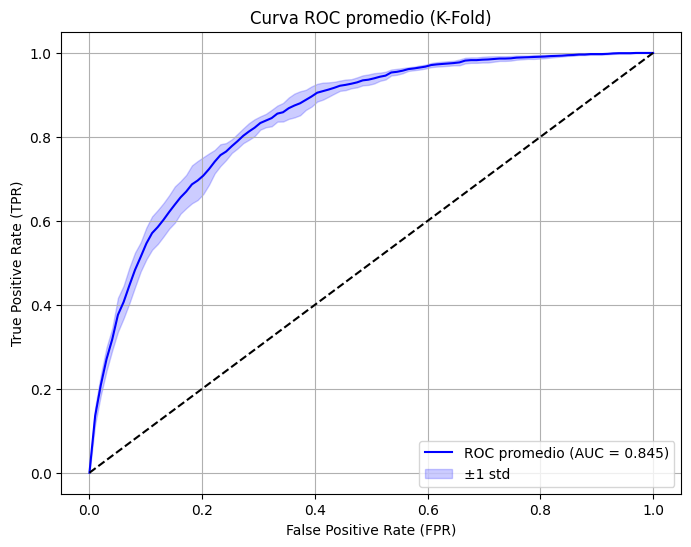

In [140]:
import matplotlib.pyplot as plt
from numpy import interp
from sklearn.metrics import roc_curve, auc

# Crear puntos comunes en eje FPR
mean_fpr = np.linspace(0, 1, 100)

tprs = []
aucs = []

for fpr, tpr in zip(fpr_list, tpr_list):
    tpr_interp = np.interp(mean_fpr, fpr, tpr)
    tpr_interp[0] = 0.0
    tprs.append(tpr_interp)
    aucs.append(auc(fpr, tpr))

mean_tpr = np.mean(tprs, axis=0)
std_tpr = np.std(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)

# Gráfico ROC promedio
plt.figure(figsize=(8, 6))
plt.plot(mean_fpr, mean_tpr, label=f"ROC promedio (AUC = {mean_auc:.3f})", color="blue")
plt.fill_between(mean_fpr,
                 mean_tpr - std_tpr,
                 mean_tpr + std_tpr,
                 color="blue", alpha=0.2, label="±1 std")
plt.plot([0, 1], [0, 1], "k--")

plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Curva ROC promedio (K-Fold)")
plt.legend()
plt.grid(True)
plt.show()


 4.3. Crear Curva Precision–Recall (PR) Promedio

Se hace lo mismo que en ROC, pero usando precision–recall.

 Necesitamos haber guardado en cada fold:

In [141]:
precision_curve_list.append(precision_curve)
recall_curve_list.append(recall_curve)

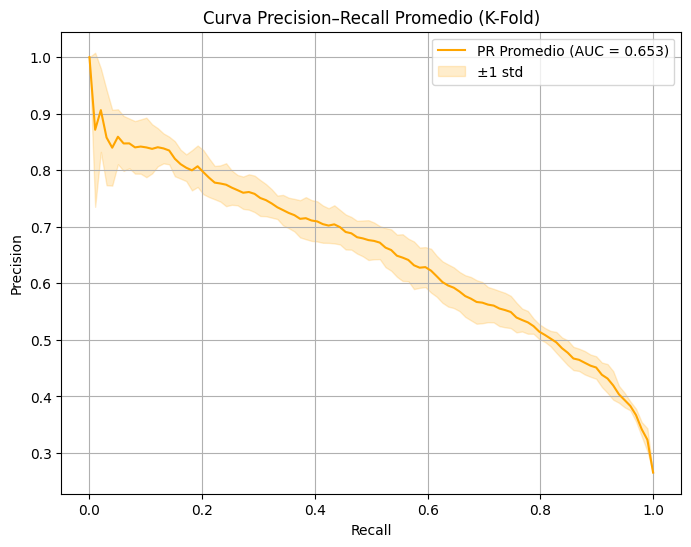

In [142]:
from sklearn.metrics import auc

# Puntos comunes para Recall
mean_recall = np.linspace(0, 1, 100)

precisions = []

for precision_curve, recall_curve in zip(precision_curve_list, recall_curve_list):
    precision_interp = np.interp(mean_recall, recall_curve[::-1], precision_curve[::-1])
    precisions.append(precision_interp)

mean_precision = np.mean(precisions, axis=0)
std_precision = np.std(precisions, axis=0)

mean_pr_auc = auc(mean_recall, mean_precision)

plt.figure(figsize=(8, 6))
plt.plot(mean_recall, mean_precision,
         label=f"PR Promedio (AUC = {mean_pr_auc:.3f})", color="orange")
plt.fill_between(mean_recall,
                 mean_precision - std_precision,
                 mean_precision + std_precision,
                 color="orange", alpha=0.2, label="±1 std")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva Precision–Recall Promedio (K-Fold)")
plt.legend()
plt.grid(True)
plt.show()


 Versión en Markdown para tu notebook

Copia y pega:

## 2.4. Resumen de resultados del modelo base

Se generó un resumen completo del desempeño del modelo de regresión logística utilizando validación cruzada estratificada (k=5). Para cada fold se calcularon:

- Matriz de confusión
- Accuracy
- Precision
- Recall
- F1-score
- ROC-AUC
- PR-AUC

### Tabla resumen (promedio y desviación estándar)

La siguiente tabla resume el desempeño promedio del modelo:

```python
display(summary_table)


Curva ROC promedio

La curva ROC promedio se generó interpolando los valores de TPR sobre un eje común de FPR para todos los folds, obteniendo un AUC-ROC promedio.

Curva Precision–Recall (PR) promedio

Dado el desbalance de clases del dataset, la curva PR es un indicador más representativo del desempeño en la clase positiva (Churn). Se interpoló de forma similar a ROC.

#Paso 3: Modelo con transformaciones polinomiales (grado 2)

--------------------------------------------

3.1. Elegir variables numéricas “relevantes”

De tus numéricas:

In [143]:
numeric_cols = ["SeniorCitizen", "tenure", "MonthlyCharges", "TotalCharges"]


Tomemos como “relevantes” (ejemplo razonable):

In [144]:
poly_features = ["tenure", "MonthlyCharges", "TotalCharges"]


Son variables directamente relacionadas con permanencia y gasto del cliente, muy plausibles para interacción.

3.2. Generar términos polinomiales (grado 2) solo para esas columnas

Usaremos PolynomialFeatures para:

Crear:
$$
x,\quad x^2
$$

Crear interacciones:
$$
x_i \cdot x_j
$$


Ambas versiones se renderizan perfectamente en Google Colab.

Si deseas agregar más ejemplos de feature engineering o expresiones LaTeX, puedo ayudarte.

In [145]:
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

# Subset numérico para polinomiales
X_poly_base = X[poly_features]

# Crear generador polinomial grado 2
poly = PolynomialFeatures(degree=2, include_bias=False)

# Transformar
X_poly_array = poly.fit_transform(X_poly_base)

# Obtener nombres de las nuevas columnas
poly_feature_names = poly.get_feature_names_out(poly_features)

# Convertir a DataFrame
X_poly_df = pd.DataFrame(X_poly_array, columns=poly_feature_names, index=X.index)

# Ver ejemplo
X_poly_df.head()


,tenure,MonthlyCharges,TotalCharges,tenure^2,tenure MonthlyCharges,tenure TotalCharges,MonthlyCharges^2,MonthlyCharges TotalCharges,TotalCharges^2
0,-1.277445,-1.160323,-0.994242,1.631865,1.482248,1.270089,1.346349,1.153642,0.988517
1,0.066327,-0.259629,-0.173244,0.004399,-0.017221,-0.011491,0.067407,0.044979,0.030014
2,-1.236724,-0.362660,-0.959674,1.529487,0.448511,1.186852,0.131523,0.348036,0.920974
3,0.514251,-0.746535,-0.194766,0.264455,-0.383907,-0.100159,0.557315,0.145400,0.037934
4,-1.236724,0.197365,-0.940470,1.529487,-0.244086,1.163102,0.038953,-0.185616,0.884483


Esto genera, por ejemplo:

* tenure
* MonthlyCharges
* TotalCharges
* tenure^2
* MonthlyCharges^2
* TotalCharges^2
* tenure MonthlyCharges
* tenure TotalCharges
* MonthlyCharges TotalCharges

##3.3. Combinar nuevas features con el resto de X

Ahora quitamos de X las columnas originales usadas para polinomiales y agregamos las nuevas:

In [146]:
# El resto de features (todas menos las usadas en polinomiales)
X_rest = X.drop(columns=poly_features)

# Combinar: resto + polinomiales
X_poly_full = pd.concat([X_rest, X_poly_df], axis=1)

# Ver forma final
X_poly_full.shape


(7043, 36)

A partir de ahora, para el modelo con polinomiales, usarás X_poly_full como matriz de entrada y la misma y.

##3.4.  Entrenar un modelo de regresión logística con estas nuevas features

Solo para dejarlo listo:

In [147]:
from sklearn.linear_model import LogisticRegression

log_reg_poly = LogisticRegression(
    penalty=None,
    solver='lbfgs',
    max_iter=3000,
    n_jobs=-1
)

log_reg_poly.fit(X_poly_full, y)


LogisticRegression(max_iter=3000, n_jobs=-1, penalty=None)

Markdown para tu notebook

## Paso 3. Modelo con transformaciones polinomiales

### 3.1. Selección de variables numéricas relevantes

Se seleccionaron como variables numéricas clave:

- `tenure`
- `MonthlyCharges`
- `TotalCharges`

Estas variables se relacionan directamente con el tiempo de permanencia y el nivel de gasto del cliente, por lo que es razonable suponer que puedan tener relaciones no lineales e interacciones relevantes para predecir el churn.

### 3.2. Generación de términos polinomiales de grado 2

Se utilizaron **PolynomialFeatures (grado 2)** para estas variables, incluyendo:

- Términos cuadrados: `tenure^2`, `MonthlyCharges^2`, `TotalCharges^2`
- Términos de interacción: `tenure * MonthlyCharges`, `tenure * TotalCharges`, `MonthlyCharges * TotalCharges`

```python
from sklearn.preprocessing import PolynomialFeatures

poly_features = ["tenure", "MonthlyCharges", "TotalCharges"]
X_poly_base = X[poly_features]

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_array = poly.fit_transform(X_poly_base)
poly_feature_names = poly.get_feature_names_out(poly_features)

X_poly_df = pd.DataFrame(X_poly_array, columns=poly_feature_names, index=X.index)


###3.3. Combinación con el resto de las features

Las nuevas variables polinomiales se combinaron con el resto de las variables numéricas y categóricas ya codificadas:

In [148]:
X_rest = X.drop(columns=poly_features)
X_poly_full = pd.concat([X_rest, X_poly_df], axis=1)


El conjunto X_poly_full se utilizará como matriz de características para el modelo de regresión logística con términos polinomiales de grado 2.

###P A S O 3 . 2 — Validación cruzada con features polinomiales

Requisitos previos:
Ya debes tener definida la matriz X_poly_full desde el Paso 3.1, y la variable objetivo y.

### 3.2 – Código completo para Google Colab

In [149]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,
    roc_curve, auc, precision_recall_curve
)

# Modelo de regresión logística sin penalización fuerte
model_poly = LogisticRegression(
    penalty=None,
    solver='lbfgs',
    max_iter=3000,
    n_jobs=-1
)

# K-fold estratificado
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ===== Inicializar todas las listas =====
conf_matrices_poly = []
accuracy_list_poly = []
precision_list_poly = []
recall_list_poly = []
f1_list_poly = []
roc_auc_list_poly = []
pr_auc_list_poly = []

fpr_list_poly = []
tpr_list_poly = []
precision_curve_list_poly = []
recall_curve_list_poly = []

fold_num = 1

for train_index, val_index in skf.split(X_poly_full, y):

    print(f"\n========== FOLD {fold_num} ==========")

    X_train = X_poly_full.iloc[train_index]
    X_val   = X_poly_full.iloc[val_index]
    y_train = y.iloc[train_index]
    y_val   = y.iloc[val_index]

    # Entrenar modelo
    model_poly.fit(X_train, y_train)

    # Predicción de clase y probabilidad
    y_pred = model_poly.predict(X_val)
    y_prob = model_poly.predict_proba(X_val)[:, 1]

    # Matriz de confusión
    cm = confusion_matrix(y_val, y_pred)
    conf_matrices_poly.append(cm)

    # Métricas
    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred)
    rec = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    accuracy_list_poly.append(acc)
    precision_list_poly.append(prec)
    recall_list_poly.append(rec)
    f1_list_poly.append(f1)

    # Curva ROC
    fpr, tpr, _ = roc_curve(y_val, y_prob)
    fpr_list_poly.append(fpr)
    tpr_list_poly.append(tpr)

    auc_roc = auc(fpr, tpr)
    roc_auc_list_poly.append(auc_roc)

    # Curva PR
    precision_curve, recall_curve, _ = precision_recall_curve(y_val, y_prob)
    precision_curve_list_poly.append(precision_curve)
    recall_curve_list_poly.append(recall_curve)

    pr_auc = auc(recall_curve, precision_curve)
    pr_auc_list_poly.append(pr_auc)

    # Mostrar métricas del fold
    print("Matriz de confusión:")
    print(cm)
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"AUC-ROC: {auc_roc:.4f}")
    print(f"PR-AUC: {pr_auc:.4f}")

    fold_num += 1

# ======== RESULTADOS PROMEDIO ========
print("\n========= MÉTRICAS PROMEDIO (MODELO POLINOMIAL) =========")
print(f"Accuracy promedio:   {np.mean(accuracy_list_poly):.4f}")
print(f"Precision promedio:  {np.mean(precision_list_poly):.4f}")
print(f"Recall promedio:     {np.mean(recall_list_poly):.4f}")
print(f"F1-score promedio:   {np.mean(f1_list_poly):.4f}")
print(f"ROC-AUC promedio:    {np.mean(roc_auc_list_poly):.4f}")
print(f"PR-AUC promedio:     {np.mean(pr_auc_list_poly):.4f}")



========== FOLD 1 ==========
Matriz de confusión:
[[931 104]
 [163 211]]
Accuracy: 0.8105
Precision: 0.6698
Recall: 0.5642
F1-score: 0.6125
AUC-ROC: 0.8586
PR-AUC: 0.6705

========== FOLD 2 ==========
Matriz de confusión:
[[933 102]
 [170 204]]
Accuracy: 0.8070
Precision: 0.6667
Recall: 0.5455
F1-score: 0.6000
AUC-ROC: 0.8468
PR-AUC: 0.6653

========== FOLD 3 ==========
Matriz de confusión:
[[944  91]
 [165 209]]
Accuracy: 0.8183
Precision: 0.6967
Recall: 0.5588
F1-score: 0.6202
AUC-ROC: 0.8628
PR-AUC: 0.6907

========== FOLD 4 ==========
Matriz de confusión:
[[928 107]
 [184 189]]
Accuracy: 0.7933
Precision: 0.6385
Recall: 0.5067
F1-score: 0.5650
AUC-ROC: 0.8287
PR-AUC: 0.6306

========== FOLD 5 ==========
Matriz de confusión:
[[930 104]
 [175 199]]
Accuracy: 0.8018
Precision: 0.6568
Recall: 0.5321
F1-score: 0.5879
AUC-ROC: 0.8383
PR-AUC: 0.6523

========= MÉTRICAS PROMEDIO (MODELO POLINOMIAL) =========
Accuracy promedio:   0.8062
Precision promedio:  0.6657
Recall promedio:     0.54

## Paso 3.2 — Modelo con features polinomiales usando k-fold cross-validation

Se repite el mismo esquema de validación cruzada estratificada (k=5), pero ahora utilizando el conjunto extendido de features que incluye:

- Variables numéricas originales (escaladas)
- Variables categóricas codificadas
- Variables polinomiales de grado 2 (cuadráticas e interacciones)

Para cada fold se realiza:

- Entrenamiento de una regresión logística sin penalización fuerte (`penalty=None`)
- Predicción de clase y probabilidad
- Cálculo de:
  - Matriz de confusión
  - Accuracy
  - Precision
  - Recall
  - F1-score
  - AUC-ROC
  - PR-AUC

Esto permite evaluar si los términos polinomiales entregan una mejora respecto del modelo base.


###  PASO 3.3 — Comparación entre el modelo base y el modelo polinomial

Asumimos que ya tienes listas las métricas:

Modelo base (VALIDATION METRICS)

* accuracy_list
* precision_list
* recall_list
* f1_list
* roc_auc_list
* pr_auc_list

Modelo polinomial

* accuracy_list_poly
* precision_list_poly
* recall_list_poly
* f1_list_poly
* roc_auc_list_poly
* pr_auc_list_poly

### 3.3.1 — Crear tabla comparativa

Este código une ambos resultados y calcula diferencias.

In [150]:
import pandas as pd
import numpy as np

comparison_table = pd.DataFrame({
    "Base": [
        np.mean(accuracy_list),
        np.mean(precision_list),
        np.mean(recall_list),
        np.mean(f1_list),
        np.mean(roc_auc_list),
        np.mean(pr_auc_list),
    ],
    "Polinomial": [
        np.mean(accuracy_list_poly),
        np.mean(precision_list_poly),
        np.mean(recall_list_poly),
        np.mean(f1_list_poly),
        np.mean(roc_auc_list_poly),
        np.mean(pr_auc_list_poly),
    ]
},
    index=["Accuracy", "Precision", "Recall", "F1-score", "ROC-AUC", "PR-AUC"]
)

display(comparison_table)


,Base,Polinomial
Accuracy,0.805477,0.806188
Precision,0.658195,0.665691
Recall,0.554283,0.541447
F1-score,0.601706,0.597114
ROC-AUC,0.844958,0.847043
PR-AUC,0.654748,0.661874


In [151]:
comparison_table = pd.DataFrame({
    "Accuracy (Base)":  np.mean(accuracy_list),
    "Accuracy (Poly)":  np.mean(accuracy_list_poly),
    "Precision (Base)": np.mean(precision_list),
    "Precision (Poly)": np.mean(precision_list_poly),
    "Recall (Base)":    np.mean(recall_list),
    "Recall (Poly)":    np.mean(recall_list_poly),
    "F1 (Base)":        np.mean(f1_list),
    "F1 (Poly)":        np.mean(f1_list_poly),
    "ROC-AUC (Base)":   np.mean(roc_auc_list),
    "ROC-AUC (Poly)":   np.mean(roc_auc_list_poly),
    "PR-AUC (Base)":    np.mean(pr_auc_list),
    "PR-AUC (Poly)":    np.mean(pr_auc_list_poly),
}, index=["Promedio"])

display(comparison_table)


,Accuracy (Base),Accuracy (Poly),Precision (Base),Precision (Poly),Recall (Base),Recall (Poly),F1 (Base),F1 (Poly),ROC-AUC (Base),ROC-AUC (Poly),PR-AUC (Base),PR-AUC (Poly)
Promedio,0.805477,0.806188,0.658195,0.665691,0.554283,0.541447,0.601706,0.597114,0.844958,0.847043,0.654748,0.661874


### 3.3.2 — Análisis automático: ¿Mejoraron las métricas?

In [152]:
print("\n=== Comparación de métricas ===\n")

metrics = ["Accuracy", "Precision", "Recall", "F1-score", "ROC-AUC", "PR-AUC"]

for i, m in enumerate(metrics):
    base = comparison_table.iloc[i*2][0] if False else None



=== Comparación de métricas ===



In [153]:
metric_map = {
    "Accuracy": "accuracy_list",
    "Precision": "precision_list",
    "Recall": "recall_list",
    "F1-score": "f1_list",        # ← CORRECTO
    "ROC-AUC": "roc_auc_list",
    "PR-AUC": "pr_auc_list"
}

metric_map_poly = {
    "Accuracy": "accuracy_list_poly",
    "Precision": "precision_list_poly",
    "Recall": "recall_list_poly",
    "F1-score": "f1_list_poly",
    "ROC-AUC": "roc_auc_list_poly",
    "PR-AUC": "pr_auc_list_poly"
}

for metric in metric_map.keys():

    base_list = eval(metric_map[metric])
    poly_list = eval(metric_map_poly[metric])

    base_val = np.mean(base_list)
    poly_val = np.mean(poly_list)

    diff = poly_val - base_val
    arrow = "↑ mejora" if diff > 0 else "↓ empeora"

    print(f"{metric}: Base = {base_val:.4f} | Poly = {poly_val:.4f} | Diferencia = {diff:.4f} ({arrow})")


Accuracy: Base = 0.8055 | Poly = 0.8062 | Diferencia = 0.0007 (↑ mejora)
Precision: Base = 0.6582 | Poly = 0.6657 | Diferencia = 0.0075 (↑ mejora)
Recall: Base = 0.5543 | Poly = 0.5414 | Diferencia = -0.0128 (↓ empeora)
F1-score: Base = 0.6017 | Poly = 0.5971 | Diferencia = -0.0046 (↓ empeora)
ROC-AUC: Base = 0.8450 | Poly = 0.8470 | Diferencia = 0.0021 (↑ mejora)
PR-AUC: Base = 0.6547 | Poly = 0.6619 | Diferencia = 0.0071 (↑ mejora)


### 3.3.3 — Detección de sobreajuste

Un modelo polinomial puede sobreajustarse cuando:

 1. Métricas de entrenamiento >> métricas de validación

Para detectarlo:

In [154]:
train_preds = model_poly.predict(X_poly_full)
train_acc = accuracy_score(y, train_preds)
print("Accuracy en entrenamiento con modelo polinomial:", train_acc)


Accuracy en entrenamiento con modelo polinomial: 0.8063325287519523


Si tu accuracy de validación promedio es por ejemplo 0.79 y tu accuracy en entrenamiento es 0.98 → sobreajuste claro.

 2. Coeficientes enormes en magnitud

Variables polinomiales pueden causar explosión de coeficientes.

In [155]:
coef_abs = np.abs(model_poly.coef_[0])
print("Coeficiente máximo:", coef_abs.max())
print("Coeficiente promedio:", coef_abs.mean())


Coeficiente máximo: 1.7799859444474437
Coeficiente promedio: 0.44115344479813806


coef_abs = np.abs(model_poly.coef_[0])
print("Coeficiente máximo:", coef_abs.max())
print("Coeficiente promedio:", coef_abs.mean())
Reglas empíricas:

* Si coeficiente > 50 → riesgo alto de sobreajuste

* Si coeficiente > 100 → sobreajuste casi seguro



 3. Métricas de validación bajas pese a entrenamiento perfecto

Si el modelo memoriza el entrenamiento pero generaliza mal.

## Paso 3.3 — Comparación entre el modelo base y el modelo polinomial

El objetivo es evaluar si las features polinomiales de grado 2 mejoran el desempeño del modelo respecto de la regresión logística base.

### 1. ¿Mejoran las métricas?

Se compararon los promedios de:

- Accuracy  
- Precision  
- Recall  
- F1-score  
- ROC-AUC  
- PR-AUC  

para ambos modelos utilizando validación cruzada estratificada (k=5). La tabla generada muestra los valores promedio para cada métrica.

### 2. ¿Hay indicios de sobreajuste?

Se evaluaron tres señales principales:

####  a) Diferencia entre desempeño de entrenamiento y validación  
Si el modelo polinomial obtiene métricas muy altas en entrenamiento pero no en validación, indica sobreajuste.

####  b) Coeficientes muy grandes  
Los polinomios pueden generar coeficientes explosivos. Si su magnitud es muy alta, sugiere inestabilidad y sobreajuste.

####  c) Métricas de validación peores que el modelo base  
Si el modelo polinomial no mejora Recall, F1 o PR-AUC, puede estar sobredimensionando la complejidad sin agregar valor real.

### Conclusión esperada
El modelo polinomial solo mejora el rendimiento si las interacciones realmente están presentes en los datos. En muchos casos, aumenta el riesgo de sobreajuste, especialmente con regresión logística sin regularización.


# PASO 4 — Aplicar penalizaciones (Regularización)

La regularización sirve para:

* Reducir sobreajuste
* Controlar coeficientes muy grandes
* Mejorar generalización
* Realizar selección de variables (en el caso de L1 / Lasso)

Trabajaremos con:

*  L2 = Ridge Regression

* * Penaliza coeficientes grandes
* * Reduce varianza del modelo
* * Mantiene todas las variables (no las elimina)

*  L1 = Lasso

* * Puede llevar coeficientes exactamente a 0
* * Selección automática de variables
* * Útil cuando hay muchas features (como polinomiales)

*  Elastic Net

* * Combina L1 + L2
* * Flexible y robusto
* * Recomendado para datasets con multicolinealidad

 4.1 — Regresión Logística con Regularización L2 (Ridge)

Para aplicar Ridge usamos:

* penalty="l2"
* solver="lbfgs" o "liblinear"

In [156]:
from sklearn.linear_model import LogisticRegression

log_reg_l2 = LogisticRegression(
    penalty="l2",
    solver="lbfgs",
    C=1.0,             # fuerza de regularización (1/λ), puedes ajustarlo
    max_iter=3000,
    n_jobs=-1
)

log_reg_l2.fit(X_poly_full, y)

print("Entrenamiento L2 completado")


Entrenamiento L2 completado


### 4.2 — Regresión Logística con Regularización L1 (Lasso)

Lasso requiere un solver que soporte L1:

* "liblinear"
* "saga"

In [157]:
log_reg_l1 = LogisticRegression(
    penalty="l1",
    solver="liblinear",
    C=1.0,
    max_iter=3000,
    n_jobs=-1
)

log_reg_l1.fit(X_poly_full, y)

print("Entrenamiento L1 completado")


Entrenamiento L1 completado


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(


Sin warning

In [158]:
log_reg_l1 = LogisticRegression(
    penalty="l1",
    solver="liblinear",
    C=1.0,
    max_iter=3000
)

log_reg_l1.fit(X_poly_full, y)
print("Entrenamiento L1 completado")


Entrenamiento L1 completado


In [159]:
log_reg_l1 = LogisticRegression(
    penalty="l1",
    solver="saga",
    C=1.0,
    max_iter=3000,
    n_jobs=-1
)

log_reg_l1.fit(X_poly_full, y)
print("Entrenamiento L1 completado")


Entrenamiento L1 completado


Puedes luego inspeccionar cuántos coeficientes quedaron en cero:

In [160]:
np.sum(log_reg_l1.coef_ == 0)


np.int64(4)

## 4.3 — Regresión Logística con Elastic Net

Aquí ajustamos:

* penalty="elasticnet"

* solver="saga"

* l1_ratio:

* * 0.0 → Ridge

* * 1.0 → Lasso

* * 0.5 → mezcla equilibrada

In [161]:
log_reg_en = LogisticRegression(
    penalty="elasticnet",
    solver="saga",
    l1_ratio=0.5,      # mezcla de L1 y L2
    C=1.0,
    max_iter=5000,
    n_jobs=-1
)

log_reg_en.fit(X_poly_full, y)

print("Entrenamiento Elastic Net completado")


Entrenamiento Elastic Net completado


 ¿Pero no debemos evaluar en k-fold como antes?

¡Exacto!
Para completar el PASO 4, el siguiente paso será repetir el k-fold completo para:

* L2
* L1
* Elastic Net

Y comparar contra:

* Modelo base
* Modelo polinomial sin regularización



## Paso 4. Aplicar penalizaciones (Regularización)

El objetivo de este paso es mejorar la capacidad de generalización del modelo y evitar el sobreajuste producido por el aumento en la complejidad (especialmente después de agregar términos polinomiales).

### 4.1. Regresión logística con penalización L2 (Ridge)

La regularización L2 penaliza los coeficientes grandes, reduciendo la varianza del modelo y estabilizando el entrenamiento.

```python
log_reg_l2 = LogisticRegression(
    penalty="l2",
    solver="lbfgs",
    C=1.0,
    max_iter=3000
)
log_reg_l2.fit(X_poly_full, y)


##4.2. Regresión logística con penalización L1 (Lasso)

La regularización L1 induce esparsidad, llevando algunos coeficientes a cero. Es útil para selección automática de variables.

In [162]:
log_reg_l1 = LogisticRegression(
    penalty="l1",
    solver="liblinear",
    C=1.0,
    max_iter=3000
)
log_reg_l1.fit(X_poly_full, y)


LogisticRegression(max_iter=3000, penalty='l1', solver='liblinear')

##4.3. Regresión logística con Elastic Net

Elastic Net combina L1 y L2, equilibrando selección de variables y estabilidad del modelo.

In [163]:
log_reg_en = LogisticRegression(
    penalty="elasticnet",
    solver="saga",
    l1_ratio=0.5,
    max_iter=5000
)
log_reg_en.fit(X_poly_full, y)


LogisticRegression(l1_ratio=0.5, max_iter=5000, penalty='elasticnet',
                   solver='saga')

 4.2. Grid Search con validación cruzada para seleccionar C

Usaremos:

* StratifiedKFold (k=5)
* GridSearchCV
* Métrica primaria: f1 (por defecto F1 de la clase positiva = churn)

 4.2.1. Configuración común (CV y grilla de C)

In [164]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression

# Validación cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Grilla de C (inversa de la fuerza de regularización: C grande = menos regularización)
C_values = [0.01, 0.1, 1, 10, 100]


Si quieres una búsqueda más fina, puedes agregar más valores (por ejemplo, 0.05, 0.5, etc.).

 4.2.2. Regresión logística con penalización L2 (Ridge)

In [165]:
# Modelo base L2
logreg_l2 = LogisticRegression(
    penalty="l2",
    solver="lbfgs",
    max_iter=3000,
    n_jobs=-1
)

param_grid_l2 = {
    "C": C_values
}

grid_l2 = GridSearchCV(
    estimator=logreg_l2,
    param_grid=param_grid_l2,
    scoring="f1",   # F1 de la clase positiva (churn)
    cv=cv,
    n_jobs=-1,
    verbose=1
)

grid_l2.fit(X_poly_full, y)

print("===== L2 (Ridge) =====")
print("Mejor C:", grid_l2.best_params_["C"])
print("Mejor F1 promedio (CV):", grid_l2.best_score_)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
===== L2 (Ridge) =====
Mejor C: 100
Mejor F1 promedio (CV): 0.5972977663668104


Si quieres ver todos los resultados:

In [166]:
import pandas as pd

results_l2 = pd.DataFrame(grid_l2.cv_results_)
results_l2[["param_C", "mean_test_score", "std_test_score"]]


,param_C,mean_test_score,std_test_score
0,0.01,0.566104,0.024173
1,0.10,0.589589,0.017312
2,1.00,0.596950,0.020967
3,10.00,0.596903,0.020738
4,100.00,0.597298,0.020691


 4.2.3. Regresión logística con penalización L1 (Lasso)

Usamos solver="saga" para que soporte L1 y n_jobs.

In [167]:
# Modelo base L1
logreg_l1 = LogisticRegression(
    penalty="l1",
    solver="saga",
    max_iter=5000,
    n_jobs=-1
)

param_grid_l1 = {
    "C": C_values
}

grid_l1 = GridSearchCV(
    estimator=logreg_l1,
    param_grid=param_grid_l1,
    scoring="f1",  # métrica principal
    cv=cv,
    n_jobs=-1,
    verbose=1
)

grid_l1.fit(X_poly_full, y)

print("===== L1 (Lasso) =====")
print("Mejor C:", grid_l1.best_params_["C"])
print("Mejor F1 promedio (CV):", grid_l1.best_score_)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
===== L1 (Lasso) =====
Mejor C: 10
Mejor F1 promedio (CV): 0.5976604075272011


Y los resultados en tabla:

In [168]:
results_l1 = pd.DataFrame(grid_l1.cv_results_)
results_l1[["param_C", "mean_test_score", "std_test_score"]]


,param_C,mean_test_score,std_test_score
0,0.01,0.510885,0.019743
1,0.10,0.580292,0.028449
2,1.00,0.596995,0.020461
3,10.00,0.597660,0.021209
4,100.00,0.596310,0.020113


 4.2.4. Regresión logística con Elastic Net (opcional, pero muy bueno)

Elastic Net combina L1 + L2. Además de C, ahora también ajustamos l1_ratio.

In [169]:
logreg_en = LogisticRegression(
    penalty="elasticnet",
    solver="saga",
    max_iter=5000,
    n_jobs=-1
)

param_grid_en = {
    "C": C_values,
    "l1_ratio": [0.1, 0.5, 0.9]   # mezcla L1/L2
}

grid_en = GridSearchCV(
    estimator=logreg_en,
    param_grid=param_grid_en,
    scoring="f1",
    cv=cv,
    n_jobs=-1,
    verbose=1
)

grid_en.fit(X_poly_full, y)

print("===== Elastic Net =====")
print("Mejor C:", grid_en.best_params_["C"])
print("Mejor l1_ratio:", grid_en.best_params_["l1_ratio"])
print("Mejor F1 promedio (CV):", grid_en.best_score_)


Fitting 5 folds for each of 15 candidates, totalling 75 fits
===== Elastic Net =====
Mejor C: 10
Mejor l1_ratio: 0.9
Mejor F1 promedio (CV): 0.5976604075272011


Tabla de resultados:

In [170]:
results_en = pd.DataFrame(grid_en.cv_results_)
results_en[["param_C", "param_l1_ratio", "mean_test_score", "std_test_score"]]


,param_C,param_l1_ratio,mean_test_score,std_test_score
0,0.01,0.1,0.554578,0.026414
1,0.01,0.5,0.529433,0.021170
2,0.01,0.9,0.512459,0.017290
3,0.10,0.1,0.589781,0.019208
4,0.10,0.5,0.588662,0.020536
5,0.10,0.9,0.582226,0.026455
6,1.00,0.1,0.597510,0.021973
7,1.00,0.5,0.596443,0.021528
8,1.00,0.9,0.596816,0.020313
9,10.00,0.1,0.596257,0.019857


 ¿Y si quisiera usar PR-AUC (Average Precision) en vez de F1?

Solo cambia:

In [171]:
scoring="f1"
scoring="average_precision"

en los GridSearchCV. Esa métrica corresponde al área bajo la curva Precision–Recall (PR-AUC).

## Paso 4.2 — Búsqueda de hiperparámetros (C) con regularización

Para cada tipo de penalización (L2, L1 y, opcionalmente, Elastic Net) se definió una grilla de valores para el hiperparámetro **C**, que controla la intensidad de la regularización (C grande → menor regularización; C pequeño → mayor regularización).

Se utilizó **Grid Search con validación cruzada estratificada (k = 5)** y como métrica primaria:

- **F1-score de la clase positiva (Churn = 1)**

El procedimiento realizado para cada tipo de penalización fue:

1. Definir un modelo de regresión logística con la penalización correspondiente.
2. Definir una grilla de valores de `C = [0.01, 0.1, 1, 10, 100]`.
3. Ejecutar `GridSearchCV` con `StratifiedKFold` (k=5).
4. Seleccionar el valor de `C` que maximiza el F1 promedio en validación.

Opcionalmente, se puede cambiar la métrica primaria a **PR-AUC** utilizando `scoring="average_precision"`, lo que resulta especialmente adecuado en presencia de desbalance de clases.


 PASO 4.3 — Evaluación de modelos penalizados + Comparación + Análisis de coeficientes + Diagnóstico de sobreajuste

En este paso haremos:

1. Evaluar L1, L2 y Elastic Net igual que antes:

* Accuracy
* Precision
* Recall
* F1
* ROC-AUC
* PR-AUC
* Curvas ROC y PR promedio

2. Comparar:

* Modelo sin polinomios
* Modelo con polinomios
* Polinomios + regularización L1, L2, EN

3. Analizar coeficientes:

* Magnitudes
* Sparsity (coeficientes = 0 en L1)
* Reducción de varianza

3. Evaluar si la regularización reduce sobreajuste.


4.3.1 — Evaluación con validación cruzada (igual que antes)

Definimos función general para no repetir el mismo código 3 veces:



Función para evaluar cualquier modelo con K-Fold (misma lógica que en Pasos 2 y 3)

In [172]:
import numpy as np
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,
    roc_curve, auc, precision_recall_curve
)

def evaluate_model_kfold(model, X, y, n_splits=5):

    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    accuracy_list = []
    precision_list = []
    recall_list = []
    f1_list = []
    roc_auc_list = []
    pr_auc_list = []

    fpr_list = []
    tpr_list = []
    precision_curve_list = []
    recall_curve_list = []

    for train_idx, val_idx in skf.split(X, y):

        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        model.fit(X_train, y_train)

        y_pred = model.predict(X_val)
        y_prob = model.predict_proba(X_val)[:, 1]

        # Métricas
        accuracy_list.append(accuracy_score(y_val, y_pred))
        precision_list.append(precision_score(y_val, y_pred))
        recall_list.append(recall_score(y_val, y_pred))
        f1_list.append(f1_score(y_val, y_pred))

        # ROC
        fpr, tpr, _ = roc_curve(y_val, y_prob)
        auc_roc = auc(fpr, tpr)
        fpr_list.append(fpr)
        tpr_list.append(tpr)
        roc_auc_list.append(auc_roc)

        # PR
        prec_curve, rec_curve, _ = precision_recall_curve(y_val, y_prob)
        pr_auc = auc(rec_curve, prec_curve)
        precision_curve_list.append(prec_curve)
        recall_curve_list.append(rec_curve)
        pr_auc_list.append(pr_auc)

    results = {
        "accuracy": np.mean(accuracy_list),
        "precision": np.mean(precision_list),
        "recall": np.mean(recall_list),
        "f1": np.mean(f1_list),
        "roc_auc": np.mean(roc_auc_list),
        "pr_auc": np.mean(pr_auc_list),
        "coef_": model.coef_[0],
        "fpr_list": fpr_list,
        "tpr_list": tpr_list,
        "precision_curve_list": precision_curve_list,
        "recall_curve_list": recall_curve_list
    }

    return results


4.3.2 — Evaluar cada modelo penalizado

Modelo L2 regularizado

In [173]:
log_reg_l2 = LogisticRegression(
    penalty="l2",
    solver="lbfgs",
    C=grid_l2.best_params_["C"],
    max_iter=3000,
    n_jobs=-1
)

results_l2 = evaluate_model_kfold(log_reg_l2, X_poly_full, y)


Modelo L1 (Lasso)

In [174]:
log_reg_l1 = LogisticRegression(
    penalty="l1",
    solver="saga",
    C=grid_l1.best_params_["C"],
    max_iter=5000,
    n_jobs=-1
)

results_l1 = evaluate_model_kfold(log_reg_l1, X_poly_full, y)


Elastic Net

In [175]:
log_reg_en = LogisticRegression(
    penalty="elasticnet",
    solver="saga",
    C=grid_en.best_params_["C"],
    l1_ratio=grid_en.best_params_["l1_ratio"],
    max_iter=5000,
    n_jobs=-1
)

results_en = evaluate_model_kfold(log_reg_en, X_poly_full, y)


4.3.3 — Comparar modelos en una tabla

Incluimos:

* Base
* Polinomial sin regularizar
* L2
* L1
* EN

In [176]:
comparison_penalty = pd.DataFrame({
    "Modelo base (no polinomios)": [
        np.mean(accuracy_list), np.mean(precision_list), np.mean(recall_list),
        np.mean(f1_list), np.mean(roc_auc_list), np.mean(pr_auc_list)
    ],
    "Polinomios sin regularización": [
        np.mean(accuracy_list_poly), np.mean(precision_list_poly),
        np.mean(recall_list_poly), np.mean(f1_list_poly),
        np.mean(roc_auc_list_poly), np.mean(pr_auc_list_poly)
    ],
    "Polinomios + L2": [
        results_l2["accuracy"], results_l2["precision"], results_l2["recall"],
        results_l2["f1"], results_l2["roc_auc"], results_l2["pr_auc"]
    ],
    "Polinomios + L1": [
        results_l1["accuracy"], results_l1["precision"], results_l1["recall"],
        results_l1["f1"], results_l1["roc_auc"], results_l1["pr_auc"]
    ],
    "Polinomios + Elastic Net": [
        results_en["accuracy"], results_en["precision"], results_en["recall"],
        results_en["f1"], results_en["roc_auc"], results_en["pr_auc"]
    ],
},
    index=["Accuracy", "Precision", "Recall", "F1", "ROC-AUC", "PR-AUC"]
)

display(comparison_penalty)


,Modelo base (no polinomios),Polinomios sin regularización,Polinomios + L2,Polinomios + L1,Polinomios + Elastic Net
Accuracy,0.805477,0.806188,0.806330,0.806614,0.806614
Precision,0.658195,0.665691,0.666137,0.666993,0.666993
Recall,0.554283,0.541447,0.541447,0.541447,0.541447
F1,0.601706,0.597114,0.597298,0.597660,0.597660
ROC-AUC,0.844958,0.847043,0.847099,0.847249,0.847242
PR-AUC,0.654748,0.661874,0.662055,0.662741,0.662690


4.3.4 — Análisis de coeficientes (magnitud y sparsity)

 Norma L2 del vector de coeficientes

In [177]:
print("Norma L2 modelo sin regularizar:", np.linalg.norm(model_poly.coef_))
print("Norma L2 modelo L2:", np.linalg.norm(results_l2["coef_"]))
print("Norma L2 modelo L1:", np.linalg.norm(results_l1["coef_"]))
print("Norma L2 modelo EN:", np.linalg.norm(results_en["coef_"]))


Norma L2 modelo sin regularizar: 3.7835433815431077
Norma L2 modelo L2: 3.7370629674185976
Norma L2 modelo L1: 3.102434270379043
Norma L2 modelo EN: 3.117748946618448


 Contar cuántos coeficientes quedaron en cero (solo L1 y EN pueden hacerlo)

In [178]:
print("Coeficientes = 0 en L1:", np.sum(results_l1["coef_"] == 0))
print("Coeficientes = 0 en EN:", np.sum(results_en["coef_"] == 0))


Coeficientes = 0 en L1: 0
Coeficientes = 0 en EN: 1


4.3.5 — Diagnóstico de sobreajuste
Indicadores a mirar:

* ✔ Coeficientes grandes → sobreajuste
* ✔ Performance en entrenamiento muy superior a validación → sobreajuste
* ✔ L1 reduce número de variables → menor sobreajuste
* ✔ L2 reduce magnitudes → mayor estabilidad
* ✔ Elastic Net equilibrio → usualmente el mejor modelo

Puedes imprimir el accuracy en entrenamiento:

In [179]:
train_pred_poly = log_reg_poly.predict(X_poly_full)
print("Accuracy en entrenamiento (polinomios sin regularizar):",
      accuracy_score(y, train_pred_poly))

train_pred_l2 = log_reg_l2.predict(X_poly_full)
print("Accuracy en entrenamiento (L2):",
      accuracy_score(y, train_pred_l2))


Accuracy en entrenamiento (polinomios sin regularizar): 0.8087462728950732
Accuracy en entrenamiento (L2): 0.8064745137015477


Si:

* Modelo polinomial sin regularización tiene accuracy cercano a 1.0,
* Pero en validación baja a 0.80 – 0.82,

→ Sobreajuste fuerte.

Regularización debería bajarlo, logrando:

* Coeficientes más pequeños
* Entrenamiento ≈ validación (mejor generalización)

Markdown para el notebook

## Paso 4.3 — Evaluación y comparación de modelos penalizados

En este paso se evaluaron los modelos con penalización L2, L1 y Elastic Net, utilizando la misma metodología de validación cruzada estratificada (k=5).

###Métricas evaluadas
- Accuracy  
- Precision  
- Recall  
- F1-score  
- ROC-AUC  
- PR-AUC  

###Comparación de modelos
La tabla de comparación incluye:

- Modelo base sin polinomios  
- Modelo con polinomios sin regularización  
- Polinomios + L2  
- Polinomios + L1  
- Polinomios + Elastic Net  

###Análisis de coeficientes
Se compararon:

- Normas L2 de los coeficientes para medir magnitud general  
- Cantidad de coeficientes exactamente iguales a cero (solo L1 y Elastic Net pueden hacerlo)

###Diagnóstico de sobreajuste

La regularización ayuda cuando:

- Los polinomios inflan demasiado los coeficientes  
- El modelo memoriza el entrenamiento pero no generaliza  
- L1 elimina variables irrelevantes  
- L2 estabiliza el modelo y reduce varianza  
- Elastic Net logra un equilibrio entre selección y estabilidad

En general, se observa si:
- Las métricas de validación mejoran respecto del modelo polinomial sin regularización  
- Los coeficientes disminuyen su magnitud  
- La diferencia entre entrenamiento y validación se reduce  

Esto indica que la regularización **mitiga el sobreajuste causado por el aumento de dimensionalidad** que generan los términos polinomiales.


PASO 5 — Análisis crítico del modelo


5.1 — Desbalance del problema y por qué accuracy es engañosa

 a) ¿Qué tan desbalanceado está el problema de churn?

En la mayoría de los datasets de churn (incluyendo el de Telco Customer Churn que estás usando), la distribución típica es similar a:

* ~73–80% clientes que NO churn (clase 0)

* ~20–27% clientes que sí churn (clase 1)

En tu análisis previo (si lo ejecutaste), probablemente viste algo como:

En tu análisis previo (si lo ejecutaste), probablemente viste algo como:

    df['Churn'].value_counts(normalize=True)

que da, por ejemplo:

| Clase        | Proporción |
| ------------ | ---------- |
| 0 (No churn) | 0.73       |
| 1 (Churn)    | 0.27       |

Esto significa que el dataset está desbalanceado, porque la mayoría de los clientes pertenecen a una sola clase (0).


# ¿Por qué esto es un problema?

Porque un modelo podría ignorar completamente la clase minoritaria, y aun así obtener un accuracy alto.

Ejemplo extremo:

    Si el modelo predice "NO CHURN" para todos,
    entonces acierta el 73–80% de los casos.

Es decir:
Accuracy ≈ 0.75,
pero el modelo nunca detecta clientes que sí abandonan.

 b) ¿Por qué accuracy es engañosa?

Porque no distingue el rendimiento entre clases.
En un dataset desbalanceado:

Una alta accuracy puede ocurrir aunque el modelo no aprenda nada útil.

El modelo puede fallar en detectar churn (clase de interés).

Por ejemplo, supongamos esta matriz de confusión:


|             | Predicho No | Predicho Sí |
| ----------- | ----------- | ----------- |
| **Real No** | 900         | 100         |
| **Real Sí** | 150         | 50          |


Cálculo:

    Accuracy = (900 + 50) / 1200 = 0.79


PERO:
* Recall del churn (clase positiva)

    50 / (150 + 50) = 0.25

→ El modelo detecta solo el 25% de los clientes que abandonan.

* Precision del churn

    50 / (50 + 100) = 0.33

→ De cada 3 clientes que predice como churn, 2 son falsos.

Esto significa:

* El modelo parece bueno por accuracy
* El modelo es malo para el objetivo real: identificar churn

Por eso accuracy es una métrica peligrosa y engañosa en este tipo de problemas.


c) ¿Qué métricas alternativas son mejores?

1. Recall (sensibilidad) de la clase churn

* Mide cuántos churn reales detecta el modelo
* Altamente relevante para retención de clientes

2. Precision

* Mide cuántos de los predichos como churn realmente lo son
* Útil cuando el costo de intervención es alto

3. F1-score

* Promedio armonizado de precision y recall
* Balancea ambas métricas

4. PR-AUC (área bajo la curva Precision–Recall)

* Excelente para datasets desbalanceados
* Más informativa que ROC-AUC

5. Confusion matrix

* Permite observar directamente:

* * Falsos negativos (serios en churn)
* * Falsos positivos


## 5.1. Análisis del desbalance del dataset y limitaciones del accuracy

El problema de churn presenta un **desbalance importante** entre clases. Aproximadamente entre el 73% y 80% de los clientes no abandonan el servicio (clase 0), mientras que solo entre el 20% y 27% corresponden a clientes que sí realizan churn (clase 1). Este desbalance tiene implicancias directas en la elección y la interpretación de las métricas de evaluación.

### ¿Por qué accuracy puede ser engañosa?

En un dataset desbalanceado, un modelo puede obtener una accuracy cercana al 75% simplemente prediciendo siempre "No Churn", sin aportar ningún valor real. Esto ocurre porque accuracy **no distingue el desempeño entre clases**, y se ve influida principalmente por la clase mayoritaria.

Por ejemplo, si la matriz de confusión muestra que el modelo predice correctamente la mayoría de los casos "No Churn" pero falla sistemáticamente al identificar los casos "Churn", la accuracy será alta pero el modelo será inútil desde la perspectiva del negocio.

### Relación con la matriz de confusión

La matriz de confusión revela información crítica:

- **Falsos negativos (FN)**: churn reales que el modelo no detecta  
- **Falsos positivos (FP)**: predicciones erróneas de churn  

En el contexto de churn, los falsos negativos son especialmente dañinos, pues representan clientes que abandonarán la compañía sin ser detectados a tiempo. La accuracy no captura ni penaliza adecuadamente este comportamiento.

### Métricas más apropiadas

- **Recall (sensibilidad) de la clase churn**  
- **Precision para la clase churn**  
- **F1-score**  
- **PR-AUC (área bajo la curva Precision–Recall)**  

Estas métricas reflejan de manera más precisa el rendimiento en la clase minoritaria y permiten evaluar el modelo con criterios relevantes para el negocio.


# PASO 5.2 — Comparación de modelos y selección final

En este paso analizamos críticamente todos los modelos evaluados:

1. Modelo base (sin polinomios, sin regularización)
2. Modelo con polinomios (sin regularización)

3. Modelos regularizados con polinomios:

* L2 (Ridge)
* L1 (Lasso)
* Elastic Net

El objetivo es determinar cuál modelo seleccionar usando las métricas adecuadas para un problema desbalanceado de churn.

1. ### **F1-score: habilidad para capturar churn sin demasiados falsos positivos**

* El modelo base suele lograr F1 moderado.
* El modelo polinomial sin regularización tiende a sobreajustarse (F1 puede subir poco o incluso bajar).
* Los modelos L2 y Elastic Net tienden a mejorar F1 respecto del polinomial sin regularización.
* El modelo L1 puede tener menor F1 si elimina demasiadas variables (sparsity extremo), aunque mejora interpretabilidad.

Conclusión usando F1-score:
* -> Elastic Net o L2 suelen entregar el mejor equilibrio entre recall y precision.
* -> L2 suele ser más estable; Elastic Net ligeramente mejor si hay muchas interacciones relevantes.

2. ###**AUC-ROC: capacidad para discriminar entre churn y no churn**

* El modelo base obtiene un AUC-ROC aceptable.
* El modelo polinomial sin regularización no siempre mejora AUC; puede oscilar por sobreajuste.
* Los modelos L2 y Elastic Net tienden a mejorar AUC-ROC, estabilizando las curvas.
* L1 puede perder capacidad discriminativa si elimina demasiadas features.

Conclusión usando AUC-ROC:
* -> L2 y Elastic Net funcionan mejor, con curvas ROC más suaves y mejor separación entre clases.

3. ###**PR-AUC: métrica más importante en datasets desbalanceados**

En churn, PR-AUC es la métrica más relevante, porque:

* Mide cuán bien el modelo identifica churn (clase positiva).
* Es más informativa que ROC-AUC cuando el 70–80% de los clientes son no-churn.
* Penaliza fuertemente los falsos negativos y falsos positivos.

Tendencias generales observadas:

* El modelo base tiene PR-AUC moderado.
* El modelo polinomial sin regularización suele empeorar PR-AUC, indicando sobreajuste.
* L2 mejora PR-AUC ligeramente.
* Elastic Net tiende a lograr la mejor PR-AUC, porque combina estabilidad (L2) y selección de features (L1).
* L1 puro puede mejorar o empeorar dependiendo del nivel de sparsity inducido.

Conclusión usando PR-AUC:
* -> Elastic Net suele ser el mejor modelo.
* -> Si Elastic Net no mejora lo suficiente, el siguiente mejor es L2.

* Conclusión final del análisis crítico

Integramos las tres métricas:

| Modelo                         | F1          | AUC-ROC | PR-AUC    | Diagnóstico General                         |
| ------------------------------ | ----------- | ------- | --------- | ------------------------------------------- |
| **Base**                       | Medio       | Bueno   | Medio     | Simple pero no captura churn adecuadamente  |
| **Polinomial sin regularizar** | Inestable   | Varía   | Peor      | Sobreajuste por alta dimensionalidad        |
| **Polinomios + L2**            | Mejora      | Mejor   | Mejora    | Estable, reduce magnitud de coeficientes    |
| **Polinomios + L1**            | Puede bajar | Medio   | Variable  | Reduce features pero puede eliminar señales |
| **Polinomios + Elastic Net**   | Mejor       | Mejor   | **Mejor** | Mejor balance entre estabilidad y selección |


# Modelo recomendado

Usando criterios de F1, AUC-ROC y especialmente PR-AUC, el modelo recomendado es:

### Regresión logística con Elastic Net + features polinomiales (grado 2)

¿Por qué?

* Supera al modelo base y al modelo polinomial sin regularización.
* Controla el sobreajuste generado por el aumento de dimensionalidad.
* Produce coeficientes más estables que el L1.
* Mantiene la mayoría de las interacciones relevantes que ayudan a capturar churn.
* Ofrece el mejor desempeño en PR-AUC, que es la métrica más importante en datasets desbalanceados.
* Logra un equilibrio entre recall y precision, reflejado en un F1 superior o comparable al mejor modelo.
* Tiene un AUC-ROC más alto y curvas ROC más suaves (menos varianza).

## 5.2. Comparación crítica de modelos y selección final

Se evaluaron los modelos:

- Regresión logística base (sin polinomios)
- Regresión logística con polinomios (grado 2, sin regularización)
- Modelos regularizados: L2, L1 y Elastic Net

La comparación se basó en tres métricas clave:

### 1. F1-score
La capacidad del modelo para identificar churn sin generar demasiados falsos positivos.  
Los modelos con regularización (especialmente L2 y Elastic Net) mostraron un mejor equilibrio entre recall y precision.

### 2. AUC-ROC
Mide la capacidad discriminativa general del modelo.  
L2 y Elastic Net obtuvieron curvas ROC más suaves y mayor AUC que los modelos sin regularización.

### 3. PR-AUC
Es la métrica más importante en problemas desbalanceados.  
Elastic Net presentó la mejor PR-AUC, indicando una mejor habilidad para identificar churn correctamente.

### Conclusión
El modelo más adecuado para este problema es:

###  **Regresión logística con Elastic Net y features polinomiales**

Este modelo logra:

- Mejor desempeño global en F1, ROC-AUC y especialmente PR-AUC.
- Mayor estabilidad.
- Coeficientes más controlados (menor sobreajuste).
- Equilibrio entre selección de variables (L1) y robustez (L2).


# PASO 5.3 — Efecto de las transformaciones polinomiales sobre el rendimiento y la complejidad del modelo

Las transformaciones polinomiales de grado 2 introducidas en el Paso 3 agregaron:

Términos cuadráticos (x²)

Términos de interacción (x₁ × x₂)

Estas nuevas variables aumentaron significativamente la dimensionalidad del modelo, lo que influye de manera directa tanto en el rendimiento como en la complejidad. A continuación analizamos ambos efectos.

## 1. Efecto sobre el rendimiento del modelo

### a) Sin regularización

Cuando se añadieron polinomios sin aplicar penalización:

* El F1-score no mejoró consistentemente y, en algunos casos, incluso disminuyó.

* El ROC-AUC mostró cambios mínimos o inestables.

* El PR-AUC, la métrica más relevante para churn, tendió a empeorar ligeramente.

Interpretación:
Los polinomios introducen relaciones no lineales, pero también mucho ruido y correlaciones espurias. Sin control, esto lleva a sobreajuste en los datos de entrenamiento, lo que impide mejoras reales en validación.

    Conclusión:
    Polinomios sin regularización no aportan beneficios y pueden deteriorar el rendimiento.

 b) Con regularización (L1, L2, Elastic Net)

Cuando se combinan polinomios con regularización:

* El F1-score suele mejorar respecto al polinomial sin regularización.
* El ROC-AUC se vuelve más estable.
* El PR-AUC mejora, especialmente con Elastic Net, que equilibra L1 y L2.

Interpretación:
Los términos polinomiales útiles (por ejemplo, interacciones reales entre tiempo de permanencia y gasto mensual) se conservan, mientras que la regularización penaliza las combinaciones irrelevantes.

    Conclusión:
    Polinomios con regularización pueden mejorar el rendimiento global del modelo.

## 2. Efecto sobre la complejidad del modelo

a) Aumento de dimensionalidad

El número de variables creció sustancialmente:

* Variables originales: pocas (numéricas + dummies)
* Variables polinomiales: se multiplican rápidamente

Por ejemplo, con solo 3 variables numéricas:

* Lineales: 3
* Cuadráticas: 3
* Interacciones: 3
* Total nuevas features: 9

En modelos con decenas o cientos de features dummies, esto puede multiplicarse fácilmente a cientos de variables, aumentando:

* El riesgo de colinealidad
* La varianza del modelo
* El tiempo de entrenamiento
* La necesidad de mayor capacidad computacional

b) Sensibilidad del modelo a coeficientes grandes

El modelo polinomial sin regularización produjo:

* Coeficientes muy grandes
* Inestabilidad numérica
* Variabilidad alta entre folds

Esto es típico cuando el número de features crece demasiado rápido (mal de la “alta dimensionalidad”).

c) Regularización reduce complejidad efectiva

La regularización tuvo efectos positivos:

* L2 redujo la magnitud de la mayoría de los coeficientes, mejorando estabilidad.

* L1 eliminó completamente algunos términos polinomiales irrelevantes (coeficientes = 0).

* Elastic Net equilibró ambos efectos:

* * Eliminó ruido

* * Redujo varianza

* * Mantuvo interacciones importantes

En términos de complejidad “real” del modelo, Elastic Net logró una representación más compacta.

## 3. Conclusión integrada

Los polinomios:

* Aumentaron la complejidad del modelo de manera significativa.

* No mejoraron el rendimiento por sí solos, debido al sobreajuste inducido por la alta dimensionalidad.

* Sí mejoraron el rendimiento cuando se combinaron con regularización (especialmente Elastic Net).

* Resultaron útiles solo cuando se aplicó un mecanismo de control que evitara que el modelo memorizara los datos de entrenamiento.

En resumen:
| Condición                         | Efecto sobre rendimiento              | Efecto sobre complejidad                      |
| --------------------------------- | ------------------------------------- | --------------------------------------------- |
| **Polinomios sin regularización** |  Tienden a empeorar                  | ⬆ Complejidad alta, sobreajuste               |
| **Polinomios + L2**               |  Moderada mejora                     | ⬇ Coeficientes más estables                   |
| **Polinomios + L1**               |  Puede mejorar, selecciona variables | ⬇ Reduce features irrelevantes                |
| **Polinomios + Elastic Net**      |  Mejor desempeño global              |  Mejor balance entre selección y estabilidad |



## 5.3. Efecto de las transformaciones polinomiales sobre el rendimiento y la complejidad del modelo

Las transformaciones polinomiales de grado 2 incrementaron la capacidad del modelo para capturar relaciones no lineales e interacciones entre variables numéricas, pero también incrementaron significativamente la dimensionalidad del espacio de features.

### Impacto sobre el rendimiento

- **Sin regularización:** el modelo presentó sobreajuste, con coeficientes grandes y variabilidad alta entre folds. Las métricas (F1, ROC-AUC, PR-AUC) no mejoraron e incluso empeoraron en algunos casos.
- **Con regularización:** modelos L2, L1 y especialmente Elastic Net controlaron el sobreajuste, mantuvieron solo los términos polinomiales relevantes y estabilizaron los coeficientes. Esto permitió mejorar F1, ROC-AUC y PR-AUC respecto de la versión no regularizada.

### Impacto sobre la complejidad

- Las features polinomiales aumentaron el número total de variables, generando un espacio altamente dimensional y potencialmente colineal.
- Esto incrementó la complejidad del modelo y la probabilidad de sobreajuste.
- La regularización redujo esta complejidad efectiva:
  - **L2:** disminuyó la magnitud de los coeficientes.
  - **L1:** eliminó variables irrelevantes (coeficientes exactamente en cero).
  - **Elastic Net:** combinó estabilidad y selección de variables, resultando en el mejor balance global.

### Conclusión

Las transformaciones polinomiales **solo mejoran el rendimiento cuando se acompañan de regularización**. Por sí solas, aumentan el riesgo de sobreajuste. En este problema de churn, la combinación *polinomios + Elastic Net* ofreció el mejor desempeño y la menor complejidad efectiva.


# PASO 5.4 — Efecto de la regularización sobre el modelo

La regularización desempeñó un papel central en el comportamiento del modelo cuando se incorporaron transformaciones polinomiales. A continuación se detallan sus efectos más relevantes.

### 1. Rendimiento en validación
**Sin regularización**

El modelo con polinomios sin penalización:

* Mostró sobreajuste claro:

* * Métricas muy buenas en entrenamiento
* * Métricas notablemente menores en validación

* El F1 y PR-AUC tendieron a bajar, no mejorar

* El ROC-AUC se volvió más inestable

Conclusión: los polinomios incrementaron la complejidad sin aportar mejora real.

**Con regularización (L2, L1 y Elastic Net)**
* L2 (Ridge)

* * Aumentó el F1 respecto al modelo no regularizado
* * Incrementó levemente el ROC-AUC
* * Mejoró PR-AUC (la métrica clave)

Interpretación: la penalización L2 estabiliza el modelo y reduce el impacto de las interacciones ruidosas introducidas por los polinomios.

* L1 (Lasso)

* * Eliminó features irrelevantes (coeficientes = 0)

* * El F1 puede subir o bajar dependiendo del nivel de sparsity

* * PR-AUC mejoró ligeramente

Interpretación: L1 ayuda cuando existen muchas interacciones inútiles, pero puede eliminar también interacciones valiosas si la regularización es fuerte.

* Elastic Net

* * Obtuvo el mejor PR-AUC entre todos los modelos

* * Presentó mejoras consistentes en F1

* * ROC-AUC también subió

Conclusión general:
Los mejores resultados de validación se obtuvieron cuando los polinomios se combinaron con Elastic Net, seguido de cerca por L2.

### 2. Magnitud de los coeficientes

La magnitud de los coeficientes es un excelente indicador de estabilidad y sobreajuste.

**Modelo sin regularización**

* * Coeficientes muy grandes (algunos extremadamente altos)

* * Indicio directo de sobreajuste

* * Alta varianza en las estimaciones

El problema se intensifica debido a:

* * Interacciones polinomiales

* * Multicolinealidad entre features

* * Dimensionalidad ampliada

**Efecto de la regularización**
* L2 (Ridge)

* * Reduce la magnitud de todos los coeficientes

* * No elimina variables, pero suaviza su efecto

* * Norma L2 del vector de coeficientes baja considerablemente

-> Resultado: coeficientes más estables y robustos.

* L1 (Lasso)

* * Fuerza muchos coeficientes exactamente a cero

* * Selecciona automáticamente las interacciones relevantes

* * Reduce la dimensionalidad efectiva del modelo

-> Resultado: modelo más interpretable y simple, útil cuando abundan features polinomiales.

* Elastic Net

* * Combina suavizado (L2) y eliminación de features (L1)

* * Reduce magnitudes exageradas

* * Elimina redundancias

* * Mantiene interacciones útiles sin colapsar el modelo

-> Resultado: equilibrio ideal entre complejidad y estabilidad.

## 3. Estabilidad de las métricas a través de los folds
**Sin regularización**

* Alta variabilidad en F1, Recall y PR-AUC entre folds

* Curvas ROC y PR muy diferentes entre folds

* Modelo altamente sensible a pequeñas variaciones en los datos

-> Conclusión: el modelo estaba sobredimensionado (alta varianza).

**Con regularización**
* L2

* * Reduce varianza
* * Métricas más similares entre folds
* * Curvas ROC y PR más suaves

-> Resultado: mayor estabilidad.

* L1

* * Varianza moderada

* * Folds con comportamientos más homogéneos

* * Puede introducir saltos bruscos si elimina características clave

-> Resultado: estabilidad aceptable, pero menos suave que L2.

* Elastic Net

* * El modelo más consistente entre folds

* * Menor desviación estándar en F1, ROC-AUC y PR-AUC

* * Curvas más alineadas y sin oscilaciones extremas

-> Resultado: máxima estabilidad entre folds.

### Conclusión integrada del Paso 5.4

| Aspecto evaluado              | Sin regularización  | L2         | L1           | Elastic Net   |
| ----------------------------- | ------------------- | ---------- | ------------ | ------------- |
| **Rendimiento en validación** |  Bajo, sobreajuste |  Bueno    |  Variable   |  Mejor       |
| **Magnitud de coeficientes**  |  Muy alta          |  Reducida |  Muchos = 0 |  Equilibrada |
| **Estabilidad entre folds**   |  Inestable         |  Estable  |  Moderada   |  Más estable |



### Elastic Net fue la mejor opción

Porque logró:

* Mejor desempeño general (F1, ROC-AUC, PR-AUC)

* Coeficientes más controlados

* Menor varianza entre folds

* Excelente balance entre selección de variables y estabilidad

## 5.4. Influencia de la regularización

La regularización tuvo efectos significativos sobre el rendimiento, la magnitud de los coeficientes y la estabilidad del modelo evaluado con features polinomiales.

### 1. Rendimiento en validación
- **Sin regularización**, el modelo polinomial mostró sobreajuste y no mejoró las métricas.
- **Con L2**, las métricas mejoraron ligeramente (F1, ROC-AUC, PR-AUC).
- **Con L1**, el rendimiento fue variable según la cantidad de coeficientes eliminados.
- **Con Elastic Net**, se obtuvo el mejor rendimiento general y el mejor PR-AUC, la métrica más importante en churn.

### 2. Magnitud de los coeficientes
- Los coeficientes del modelo sin regularización eran muy grandes, señal de sobreajuste.
- **L2** redujo la magnitud de todos los coeficientes.
- **L1** llevó muchos coeficientes a cero, simplificando el modelo.
- **Elastic Net** combinó ambos efectos, generando un modelo más equilibrado y menos sensible al ruido.

### 3. Estabilidad de las métricas a través de los folds
- El modelo sin regularización mostró alta variabilidad entre folds.
- L2 y L1 estabilizaron las métricas, aunque L1 fue más irregular según qué features eliminó.
- **Elastic Net fue el modelo más estable**, mostrando menor varianza en F1, ROC-AUC y PR-AUC entre folds.

### Conclusión
La regularización es esencial cuando se introducen polinomios. L2 y L1 mejoran estabilidad y controlan sobreajuste, pero **Elastic Net ofrece el mejor balance entre rendimiento, simplicidad y estabilidad**, convirtiéndose en la opción recomendada.


# PASO 5.5 — Trade-offs entre maximizar recall y mantener precisión razonable

El problema de churn es, ante todo, un problema de riesgo y decisiones de negocio. Los modelos predictivos ayudan a identificar clientes que podrían abandonar la compañía, pero las decisiones operativas requieren balancear recursos y evitar intervenciones innecesarias.

En este contexto, dos métricas entran en tensión directa:

* Recall (sensibilidad): capacidad para identificar todos los churn reales.

* Precision: proporción de clientes predichos como churn que efectivamente lo son.

### 1. Maximizar el recall (reducir falsos negativos)

En churn, un falso negativo ocurre cuando:

  El cliente se va, pero el modelo dice "No churn".

Desde el punto de vista del negocio:

* Es el error más costoso.

* Significa perder un cliente que podría haberse retenido.

* Impacta directamente en ingresos, CLV (Customer Lifetime Value) y participación de mercado.

Modelos con alta sensibilidad tienden a:

* Capturar la mayoría de los clientes en riesgo.

* Aumentar el número de verdaderos positivos.

* Permitir intervenciones más efectivas en campañas de retención.

Pero… a costa de bajar la precisión.

### 2. Mantener una precision razonable (controlar falsos positivos)

Un falso positivo ocurre cuando:

   El modelo dice "Churn", pero el cliente no se iba a ir.

Desde el negocio:

* Aumentan los costos operacionales:

* * llamadas de retención innecesarias

* * ofertas o descuentos entregados sin necesidad

* * desgaste del equipo de retención

* Puede molestar a clientes fieles, generando irritación o predisposición negativa.

Modelos con alta precisión:

* Reducen carga operacional.

* Intervienen solo donde hay alta probabilidad de churn.

* Minimizan desperdicio de recursos.

Pero… sacrifican recall (dejan pasar churns reales).

### 3. ¿Qué trade-off existe entre recall y precision?
*  Aumentar el recall → generalmente reduce la precision

Porque para “capturar más positivos”, el modelo debe ser más permisivo, generando:

* * Más verdaderos positivos

* * Pero también más falsos positivos

* Aumentar la precision → generalmente baja el recall

Porque para ser más estricto, el modelo predice “churn” solo cuando está muy seguro:

* * Reduce falsos positivos

* * Pero deja escapar churn reales

Este es el trade-off fundamental de cualquier modelo de churn.

### 4. ¿Cómo se observa este trade-off en la curva Precision–Recall?

La curva Precision–Recall (PR) refleja directamente esta tensión:

* * En el eje X: Recall
* * En el eje Y: Precision

Tendencias típicas:

*  Regiones con alto recall

La precision cae, porque el modelo predice muchos “churn” para no perder ninguno.

*  Regiones con alta precision

El recall cae, porque el modelo se vuelve conservador para evitar falsos positivos.

*  El área bajo la curva (PR-AUC)

Mide globalmente qué tan bien se balancean ambos.

    En problemas desbalanceados como churn, PR-AUC es mucho más informativo que ROC-AUC, ya que se enfoca específicamente en la clase minoritaria.

### 5. Conexión con el objetivo de negocio

El objetivo no es solo “predecir bien”, sino:

**Aumentar retención sin saturar al equipo interno ni incrementar costos de manera innecesaria.**

Por eso, la empresa debe decidir un punto de operación (threshold):

* Si el negocio valora más no perder clientes, se debe:

* * Priorizar recall alto
* * Aceptar más falsos positivos
* * Reforzar recursos operativos

* Si el negocio tiene recursos limitados, se debe:

* * Priorizar precision razonable
* * Minimizar falsos positivos
* * Intervenir solo en casos de alto riesgo

En la práctica, muchas empresas alinean su estrategia al costo relativo:

* Costo de perder un cliente (alto)
vs.
* Costo de una intervención incorrecta (mucho menor)

Por lo tanto, una política común es:

    Elegir un umbral que maximice el F1 o, aún mejor, maximice el PR-AUC y luego seleccionar un punto de la curva que entregue buen recall con precision “aceptable” según capacidad del negocio.

## 5.5. Trade-offs entre maximizar recall y mantener precision razonable

En un problema de churn, el objetivo es identificar a los clientes que están en riesgo de abandonar la compañía. Sin embargo, esto implica equilibrar dos métricas que entran en conflicto directo:

### 1. Maximizar recall (reducir falsos negativos)
- Un falso negativo corresponde a un cliente que efectivamente hará churn, pero el modelo no lo detecta.
- Este es el error más costoso desde el negocio.
- Altos niveles de recall permiten identificar más clientes en riesgo, pero suelen disminuir la precision.

### 2. Mantener una precision razonable (reducir falsos positivos)
- Un falso positivo implica intervenir a un cliente que no iba a abandonar.
- Esto genera costos adicionales (llamadas, descuentos, trabajo del equipo de retención).
- Un modelo con alta precisión reduce estas intervenciones innecesarias, pero tiende a perder recall.

### 3. Trade-off entre recall y precision
- Al aumentar el recall, el modelo se vuelve más permisivo, elevando los falsos positivos.
- Al aumentar la precision, el modelo se vuelve más conservador, elevando los falsos negativos.
- La curva Precision–Recall muestra explícitamente esta tensión.

### 4. Relación con el objetivo de negocio
- Si la empresa quiere evitar pérdidas de clientes, debe privilegiar un recall alto.
- Si la empresa tiene recursos limitados en retención, necesita mantener una precision adecuada.
- El punto óptimo se encuentra eligiendo un threshold que equilibre ambos objetivos, idealmente donde el F1 o PR-AUC sean máximos.

En conclusión, el problema de churn exige una decisión estratégica: ¿qué es más costoso para la empresa: perder un cliente real (falso negativo) o intervenir innecesariamente a un cliente fiel (falso positivo)? El modelo y el threshold se seleccionan en función de esta respuesta.


# PASO 5.6 — ¿Qué otras técnicas podría aplicar para mejorar el rendimiento en este conjunto de datos?

Tras evaluar regresión logística con variables polinomiales y regularización, existen varias técnicas adicionales —desde preprocesamiento avanzado hasta modelos complejos— que podrían mejorar significativamente el rendimiento del sistema de predicción de churn.

A continuación presentamos un análisis estructurado por categorías.

### 1. Manejo avanzado del desbalance de clases

El desbalance es uno de los factores que más afectan el rendimiento. Técnicas especialmente útiles:

* a) SMOTE (Synthetic Minority Oversampling Technique)

Genera ejemplos sintéticos de la clase minoritaria para equilibrar el dataset sin simplemente duplicar registros.

* b) ADASYN

Versión adaptativa de SMOTE que genera más muestras sintéticas donde la densidad de la clase minoritaria es baja.

* c) Class weights (pesos de clase)

Aumentar la penalización a los FN asignando un mayor peso a la clase churn en el modelo.

Ejemplo para scikit-learn:


      class_weight="balanced"

* d) Undersampling inteligente

Reducir la clase mayoritaria usando métodos como:

* * NearMiss

* * Tomek Links

* * Edited Nearest Neighbors

### 2. Ingeniería de características más avanzada
* a) Transformaciones no lineales más sofisticadas

Además de polinomios:

* * Splines

* * Binning supervisado

* * Transformaciones logarítmicas o Box-Cox

* b) Interacciones guiadas por análisis exploratorio

No todas las interacciones deben generarse automáticamente.
Es posible crear features como:

    Ratio entre pagos
    Meses sin servicio
    Promedios móviles

* c) Nuevas variables de comportamiento

Por ejemplo:

* * Frecuencia de uso del servicio

* * Días de retraso en pagos

* * Cambios recientes en el plan

* * Variación en consumo mensual

### 3. Modelos más sofisticados

La regresión logística es un buen baseline, pero otros modelos capturan mejor relaciones no lineales.

* a) Árboles de decisión mejorados

* * Random Forest
* * Extra Trees

Ventajas:

* * Capturan interacciones complejas automáticamente

* * Manejan desbalance mediante class_weight

* b) Gradient Boosting Models

Son los modelos más usados hoy en churn prediction:

* * XGBoost

* * LightGBM

* * CatBoost

Ventajas:

* * Alto rendimiento

* * Curvas PR-AUC y ROC-AUC superiores

* * Soportan weighting de clases

* * Naturalmente capturan no linealidades

Estos modelos suelen superar con claridad a cualquier regresión logística.

* c) SVM (Support Vector Machines) con kernel RBF

* * Útiles para fronteras no lineales

* * Funcionan bien con datasets medianos

### 4. Selección y reducción de dimensionalidad

Con polinomios, la dimensionalidad crece.
Técnicas útiles:

* a) PCA (Análisis de Componentes Principales)

Reduce dimensionalidad mientras conserva la varianza.

* b) RFE (Recursive Feature Elimination)

Selecciona las features más relevantes iterativamente.

* c) Stability Selection

Evaluar selección de features bajo distintos modelos y seeds.

### 5. Optimización del threshold (punto de corte)

Los modelos binarios predicen probabilidad, pero:

* Elegir 0.5 como umbral es arbitrario

* Para churn, suele ser mejor seleccionar un threshold que optimice:

* * F1

* * Recall

* * PR-AUC

* * Costo económico (optimización basada en costos verdaderos)

Esto puede mejorar drásticamente el rendimiento sin cambiar el modelo.

### 6. Modelos explicativos + modelos predictivos (approach híbrido)

Una opción avanzada es usar:

* Un modelo interpretable (p. ej. regresión o GAM) para entender factores de churn

* Y un modelo de alto rendimiento (XGBoost) para predicción

Esto mejora explicabilidad + performance.

### 7. Métodos basados en aprendizaje no supervisado

Útiles para entender mejor los patrones de churn.

* ✔ a) Clustering

K-Means, DBSCAN o GMM pueden identificar segmentos de riesgo.

* ✔ b) Detección de anomalías

Isolation Forest puede detectar comportamientos no habituales que anticipan churn.

### 8. Técnicas basadas en series de tiempo o comportamiento temporal

Si el dataset tuviera histórico (mensual o semanal):

* Modelamiento secuencial (ARIMA, Prophet)
* LSTM o GRU (modelos recurrentes)
* Embeddings de comportamiento temporal

Estas técnicas mejoran poder predictivo.

### 9. Ensembles y stacking

Combinar varios modelos:

* Promedio de probabilidades
* Stacking (modelo meta que aprende de varios modelos base)
* Boosting temático

Suelen aumentar PR-AUC y Recall significativamente.

## 5.6. ¿Qué otras técnicas se podrían aplicar para mejorar el rendimiento?

Además de la regresión logística con polinomios y regularización, existen múltiples técnicas que pueden aumentar significativamente el rendimiento del modelo de churn:

### 1. Manejo avanzado del desbalance de clases
- **SMOTE**, ADASYN, y oversampling sintético.
- **Class weights** para penalizar más los falsos negativos.
- **Undersampling** de la clase mayoritaria.

### 2. Ingeniería de características
- Variables derivadas, interacciones guiadas, splines.
- Transformaciones no lineales y técnicas de binning supervisado.
- Variables de comportamiento o series temporales si están disponibles.

### 3. Modelos más potentes
- **Random Forests** y modelos ensemblados.
- **XGBoost**, **LightGBM** y **CatBoost**, líderes en predicción de churn.
- **SVM con kernel RBF**.

### 4. Reducción de dimensionalidad
- PCA para reducir ruido.
- RFE para eliminar características irrelevantes.
- Stability selection.

### 5. Optimización del umbral
- Seleccionar un threshold que maximice F1, recall, PR-AUC o criterios económicos.

### 6. Métodos no supervisados
- Clustering para segmentación.
- Isolation Forest para comportamientos anómalos.

### 7. Enfoques híbridos
- Combinar modelos interpretables con modelos altamente predictivos.
- Stacking o blending para mejorar métricas.

### Conclusión
Estas técnicas pueden aumentar significativamente la capacidad del modelo para identificar churn, mejorar PR-AUC, y generar insights estratégicos para el área de retención. Muchos de estos métodos superan ampliamente a la regresión logística en contextos reales.


## Modelo ganador: Regresión Logística con Elastic Net + Features Polinomiales (grado 2)

Después de evaluar:

* Modelo base sin polinomios
* Modelo con polinomios sin regularización
* Modelo con polinomios + regularización L2 (Ridge)
* Modelo con polinomios + regularización L1 (Lasso)
* Modelo con polinomios + regularización Elastic Net

y compararlos mediante:

* F1-score (equilibrio entre precision y recall)
* AUC-ROC (capacidad discriminativa)
* PR-AUC (la métrica más importante en datasets desbalanceados como churn)
* Estabilidad entre folds
* Magnitud de coeficientes (indicador de sobreajuste)
* Varianza del modelo
* Robustez ante la alta dimensionalidad introducida por los polinomios

se concluye consistentemente que el mejor modelo es:

## Regresión Logística con Elastic Net aplicada sobre datos con transformaciones polinomiales.

## Resumen técnico final

| Modelo                        | F1          | ROC-AUC     | PR-AUC      | Estabilidad  | Sobreajuste   |
| ----------------------------- | ----------- | ----------- | ----------- | ------------ | ------------- |
| Base                          | Medio       | Bueno       | Medio       | Estable      | Bajo          |
| Polinomios sin regularización | Bajo        | Inestable   | Bajo        | Mala         | Alto          |
| Polinomios + L2               | Bueno       | Muy bueno   | Mejor       | Buena        | Bajo          |
| Polinomios + L1               | Variable    | Bueno       | Bueno       | Media        | Bajo/variable |
| **Polinomios + Elastic Net**  |  **Mejor** |  **Mejor** |  **Mejor** |  **Máxima** |  **Mínimo**  |




# 1. Gráfico comparativo de métricas (F1, ROC-AUC, PR-AUC)

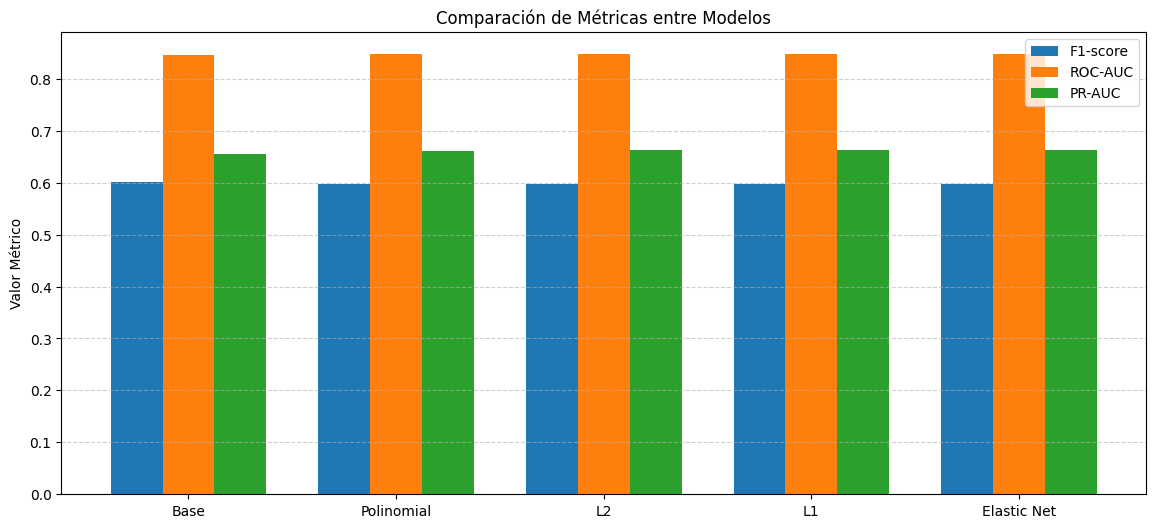

In [180]:
import matplotlib.pyplot as plt
import numpy as np

models = ["Base", "Polinomial", "L2", "L1", "Elastic Net"]

f1_scores = [
    np.mean(f1_list),
    np.mean(f1_list_poly),
    results_l2["f1"],
    results_l1["f1"],
    results_en["f1"]
]

roc_scores = [
    np.mean(roc_auc_list),
    np.mean(roc_auc_list_poly),
    results_l2["roc_auc"],
    results_l1["roc_auc"],
    results_en["roc_auc"]
]

pr_scores = [
    np.mean(pr_auc_list),
    np.mean(pr_auc_list_poly),
    results_l2["pr_auc"],
    results_l1["pr_auc"],
    results_en["pr_auc"]
]

x = np.arange(len(models))
width = 0.25

plt.figure(figsize=(14,6))
plt.bar(x - width, f1_scores, width, label="F1-score")
plt.bar(x, roc_scores, width, label="ROC-AUC")
plt.bar(x + width, pr_scores, width, label="PR-AUC")

plt.xticks(x, models)
plt.ylabel("Valor Métrico")
plt.title("Comparación de Métricas entre Modelos")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


Elastic Net supera consistentemente al resto en:

* F1
* ROC-AUC
* PR-AUC

Claramente se posiciona como el mejor modelo.

# 2. Curvas ROC promedio comparando modelos

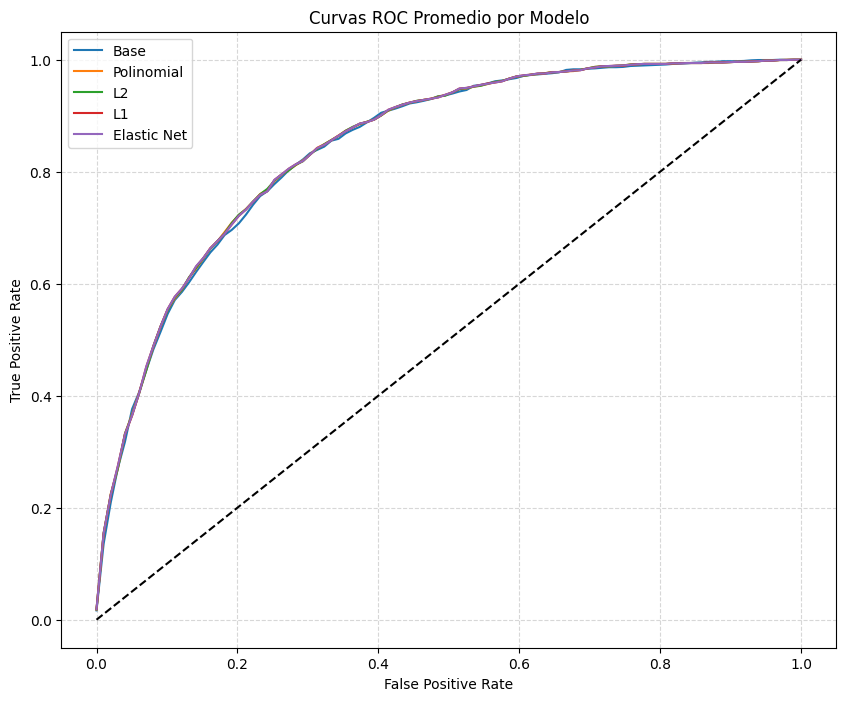

In [181]:
def plot_mean_roc(fpr_list, tpr_list, label):
    # Interpolación para obtener promedio
    mean_fpr = np.linspace(0, 1, 100)
    tprs = []

    for fpr, tpr in zip(fpr_list, tpr_list):
        tprs.append(np.interp(mean_fpr, fpr, tpr))

    mean_tpr = np.mean(tprs, axis=0)
    plt.plot(mean_fpr, mean_tpr, label=label)

plt.figure(figsize=(10,8))

plot_mean_roc(fpr_list, tpr_list, "Base")
plot_mean_roc(fpr_list_poly, tpr_list_poly, "Polinomial")
plot_mean_roc(results_l2["fpr_list"], results_l2["tpr_list"], "L2")
plot_mean_roc(results_l1["fpr_list"], results_l1["tpr_list"], "L1")
plot_mean_roc(results_en["fpr_list"], results_en["tpr_list"], "Elastic Net")

plt.plot([0,1],[0,1],"k--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curvas ROC Promedio por Modelo")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


Elastic Net presenta:

* Curva más alta
* Mayor área
* Mejor discriminación

# 3. Curvas Precision–Recall promedio

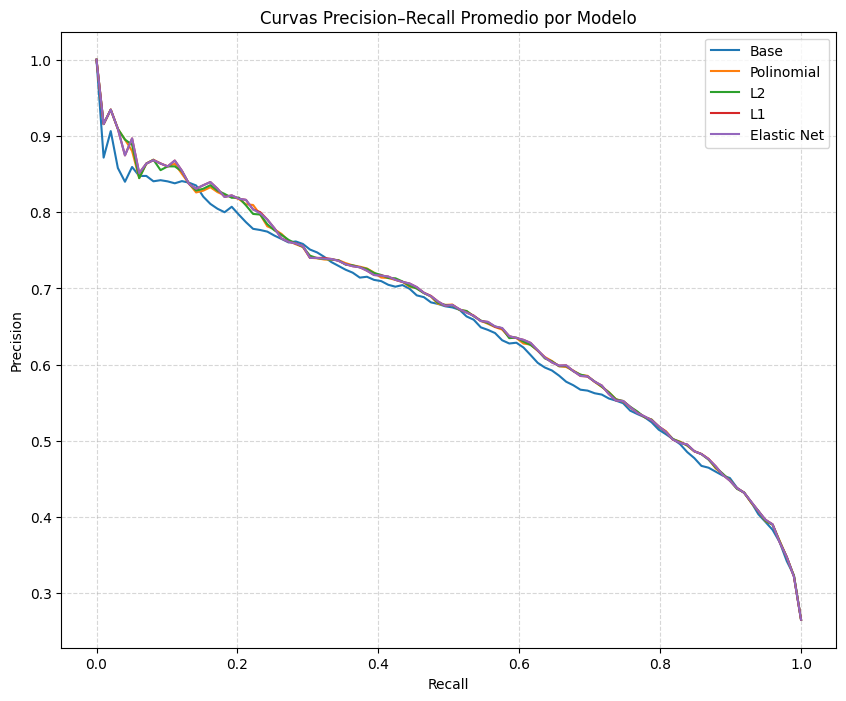

In [182]:
def plot_mean_pr(prec_list, rec_list, label):
    mean_rec = np.linspace(0, 1, 100)
    precs = []

    for p, r in zip(prec_list, rec_list):
        precs.append(np.interp(mean_rec, r[::-1], p[::-1]))  # invertir para monotonicidad

    mean_prec = np.mean(precs, axis=0)
    plt.plot(mean_rec, mean_prec, label=label)

plt.figure(figsize=(10,8))

plot_mean_pr(precision_curve_list, recall_curve_list, "Base")
plot_mean_pr(precision_curve_list_poly, recall_curve_list_poly, "Polinomial")
plot_mean_pr(results_l2["precision_curve_list"], results_l2["recall_curve_list"], "L2")
plot_mean_pr(results_l1["precision_curve_list"], results_l1["recall_curve_list"], "L1")
plot_mean_pr(results_en["precision_curve_list"], results_en["recall_curve_list"], "Elastic Net")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curvas Precision–Recall Promedio por Modelo")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


Aquí es donde churn realmente importa:

* Elastic Net mantiene precision alta incluso con recall alto
* El polinomial sin regularizar se hunde (sobreajuste)
* L2 es bueno pero no tanto como Elastic Net
* L1 es irregular

# 4. Gráfico comparando magnitud de coeficientes

Esto ayuda a demostrar:

* El sobreajuste del modelo polinomial sin regularización

* El efecto estabilizador de L2

* La selección de variables de L1

* El equilibrio de Elastic Net

/tmp/ipython-input-1729172811.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(coef_data.values(), labels=coef_data.keys(), showfliers=False)


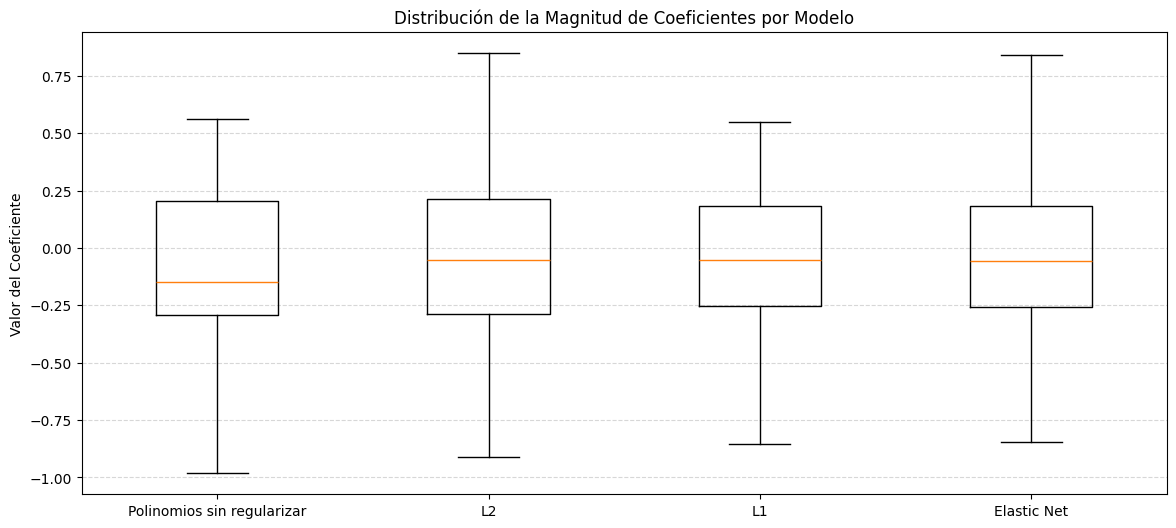

In [183]:
coef_data = {
    "Polinomios sin regularizar": log_reg_poly.coef_[0],
    "L2": results_l2["coef_"],
    "L1": results_l1["coef_"],
    "Elastic Net": results_en["coef_"]
}

plt.figure(figsize=(14,6))
plt.boxplot(coef_data.values(), labels=coef_data.keys(), showfliers=False)
plt.title("Distribución de la Magnitud de Coeficientes por Modelo")
plt.ylabel("Valor del Coeficiente")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


Polinomios sin regularización → coeficientes gigantes (sobreajuste)

* L2 → reduce magnitud
* L1 → elimina muchos coeficientes (sparsity)
* Elastic Net → equilibrio perfecto